# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

**Team 4** 


>   Jeniffer Mukami Mariga

>    Lungisa Nhlakanipho Joctrey

>    Sixolile Jafta <


confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Spain Electricity Shortfall.

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:


The problem statement reads as follows:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

    

In this section the libraries that will be used  in the  the analysis and modelling are imported. 

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns

# Libraries for data preparation and model building
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.correlation import plot_corr
from scipy import stats
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


 In this section data from the `df_train` file is loaded into a DataFrame. 



In [2]:
df = pd.read_csv("df_train.csv")
pd.set_option('display.max_columns', None)
df.head(5) 

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


    
In this section, an indept anaylsis of all the variables in the DataFrame will be performed.

We will look at:

-  Numerical and categorical features
-  Features with null values
-  Descriptive analysis 3.4 Distribution and Skewnes
-  Distribution and Skewnes
-  Outliers
-  Correlation and Multicollinearitys

###  3.1 Numerical and categorical features

The method df.infor is used on the dataframe. This will provide  information about the data types of the variables, the number of varibles and the non-null count for each variable.

In [4]:
# look at data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

Above it is observed that there are features that contain non-numerical values. These are __*Time*, *Valencia_wind_deg*__ and __*Seville_pressure*__. A regression model can only work with  numerical data (int or float). These features will be converted to numerical information in  Part 4, data engineering.


###  3.2 Null Values

The function df.isnull().sum() is applied on the dataframe. This will give  information about which variables have null values.

In [5]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

Above it is observed that __*Valencia_pressure*__ has 2068 Null values.  The missing values will be filled using the "fillna" fuction in the data engineering section.  The *__"Unnamed: 0"__* feature will also be removed because it is redundant. 

### 3.3 Descriptive analysis

The description of the dataset can be observed by using the method df.describe().

In [6]:
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.00

It is obsserved  that __*load_shortfall_3h*__ has negative values the lowest being -6618.

We believe that the Load Short Fall is the difference between the power generation through fossil fuel and renewable energy sources. The negative values of the Load Short Fall  mean that the fossil fuel is doing better than renewable energy in generating electricity and positive values could mean that renewable energy is doing well compared to fossil fuel.


Standard deviation is a measure of average distance from the mean. It is used to measure how dispersed the data is in relation to the mean. We can use coefficient of variation (CV) to measure how spread out values are in a dataset relative to the mean. The CV is a ratio between the standard deviation and the mean. The higher the CV, the higher the standard deviation relative to the mean. In general, a CV value greater than 1 is often considered high.

In [7]:
CV=abs(df.std(axis = 0))/abs(df.mean(axis = 0))


print(CV)

Unnamed: 0               0.577449
Madrid_wind_speed        0.762810
Bilbao_rain_1h           2.761647
Valencia_wind_speed      0.932303
Seville_humidity         0.361022
Madrid_humidity          0.423853
Bilbao_clouds_all        0.748831
Bilbao_wind_speed        0.916520
Seville_clouds_all       1.769809
Bilbao_wind_deg          0.642035
Barcelona_wind_speed     0.624351
Barcelona_wind_deg       0.467488
Madrid_clouds_all        1.440615
Seville_wind_speed       0.689841
Barcelona_rain_1h        4.923986
Seville_rain_1h          4.459006
Bilbao_snow_3h          17.462507
Barcelona_pressure      10.212992
Seville_rain_3h         15.088844
Madrid_rain_1h           4.036128
Barcelona_rain_3h        9.088357
Valencia_snow_3h        57.766503
Madrid_weather_id        0.099949
Barcelona_weather_id     0.115071
Bilbao_pressure          0.009871
Seville_weather_id       0.092867
Valencia_pressure        0.009393
Seville_temp_max         0.029837
Madrid_pressure          0.021972
Valencia_temp_

C:\Users\lnzon\AppData\Local\Temp/ipykernel_16172/2118448874.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  CV=abs(df.std(axis = 0))/abs(df.mean(axis = 0))


From the calculation of the CV. It is observed that the following variables have high CVs. This means that these variables have a greater level of dispersion around the mean. They are less reliable.

-  Bilbao_rain_1h           
-  Seville_clouds_all       
-  Madrid_clouds_all        
-  Barcelona_rain_1h
-  Seville_rain_1h
-  Bilbao_snow_3h
-  Barcelona_pressure
-  Seville_rain_3h
-  Valencia_snow_3h

The highest CV is from the feature Valencia_snow_3h with a CV of 58. Bilbao_snow_3h has the second highest CV with 17.

### 3.4 Distribution and Skewness

Skewed data means that there is a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution. If the data is too skewed, then the model may not work because the tail region may act as outlier of the statistical model. It will be necessary to transform the skewed data to a close enough normal distribution for the model to work.


If the skewness is between -0.5 and 0.5, the data is fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data is moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.


In [8]:
#skewness
df.skew()

C:\Users\lnzon\AppData\Local\Temp/ipykernel_16172/1845034634.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

The following variables have skewness values that are great and less than 1. The distributions of the following these variables are highly skewed.

- Madrid_wind_speed      
- Bilbao_rain_1h           
- Valencia_wind_speed      
- Bilbao_wind_speed        
- Seville_clouds_all       
- Barcelona_wind_speed     
- Madrid_clouds_all        
- Seville_wind_speed       
- Barcelona_rain_1h        
- Seville_rain_1h          
- Bilbao_snow_3h          
- Barcelona_pressure      
- Seville_rain_3h         
- Madrid_rain_1h           
- Barcelona_rain_3h       
- Valencia_snow_3h        
- Madrid_weather_id       
- Barcelona_weather_id    
- Seville_weather_id      
- Valencia_pressure       
- Madrid_pressure         
- Bilbao_weather_id   

*__Histogram plots__*


The distributions of the variables can be observed by looking at their respective histograms and barplots. The skewness of the variables wil be observed with these plots.

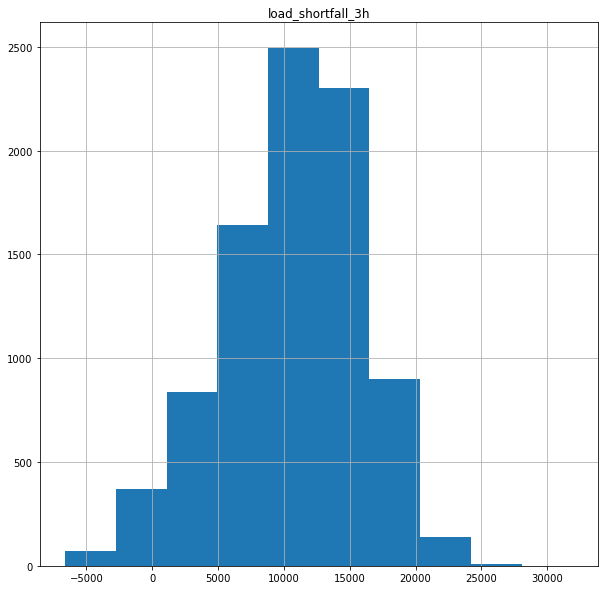

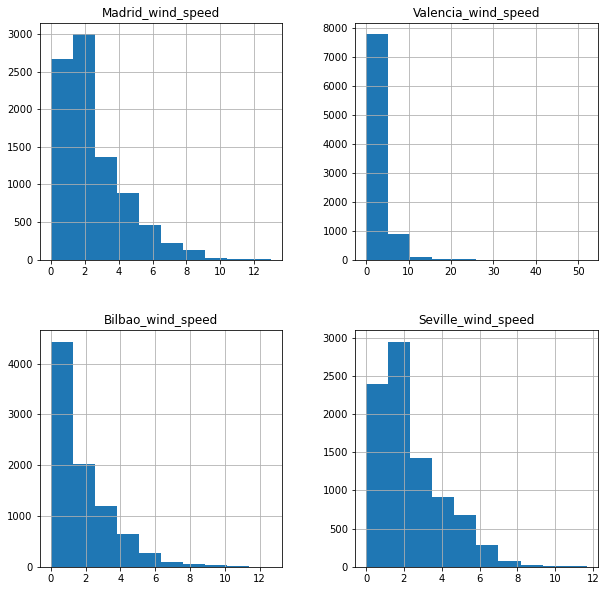

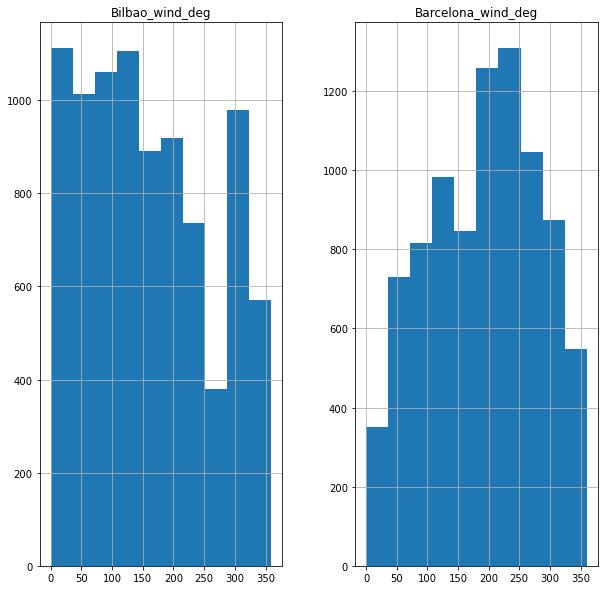

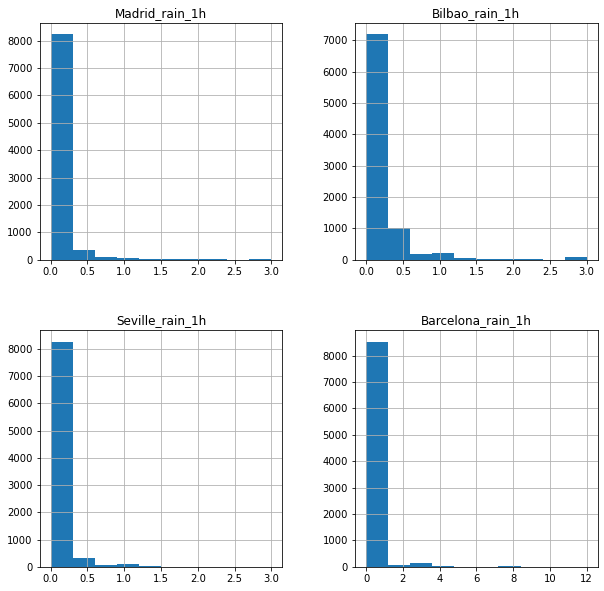

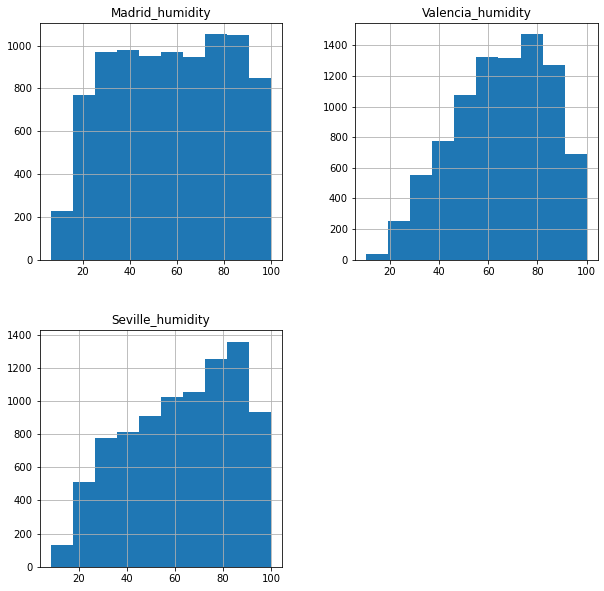

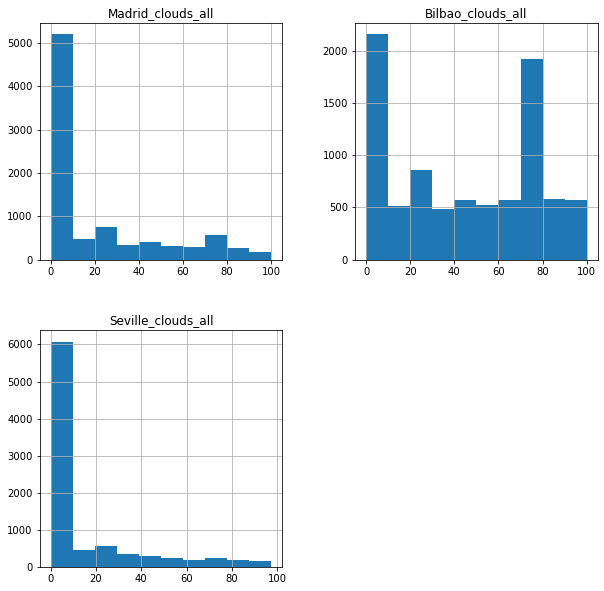

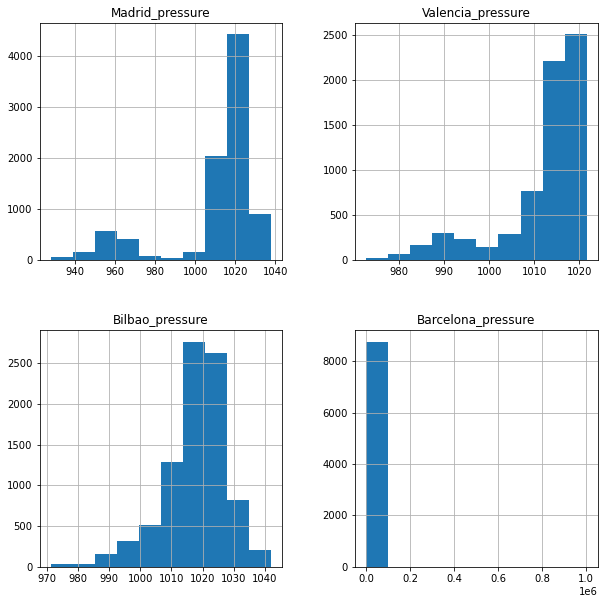

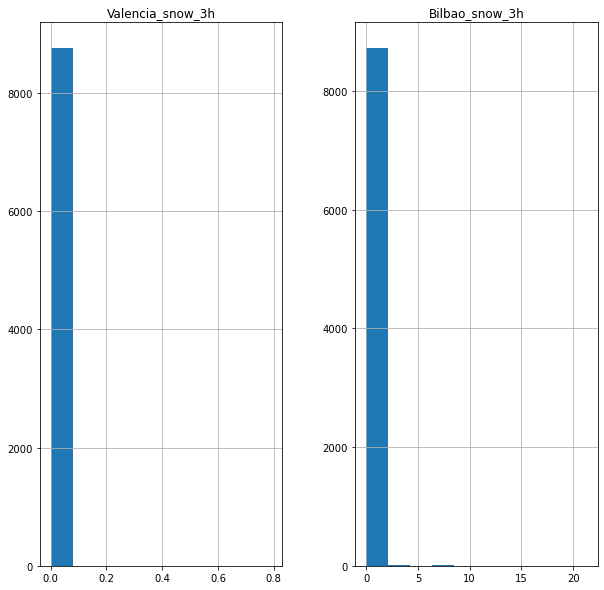

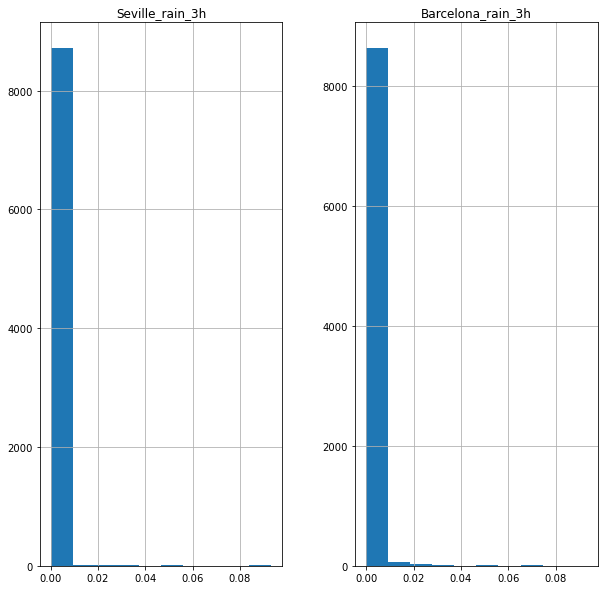

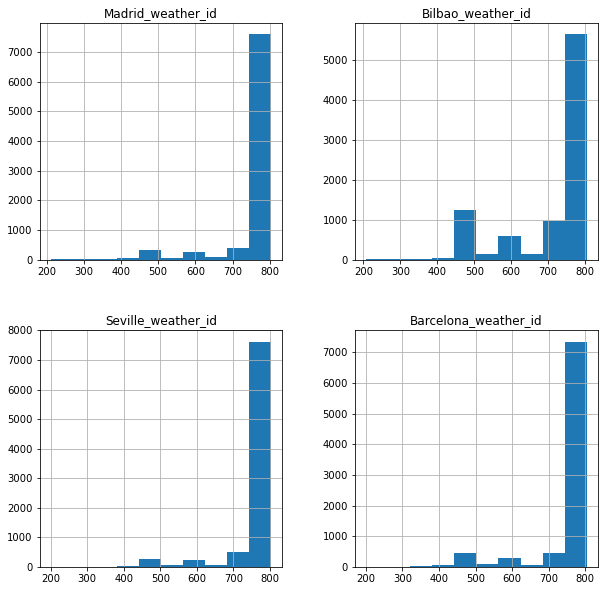

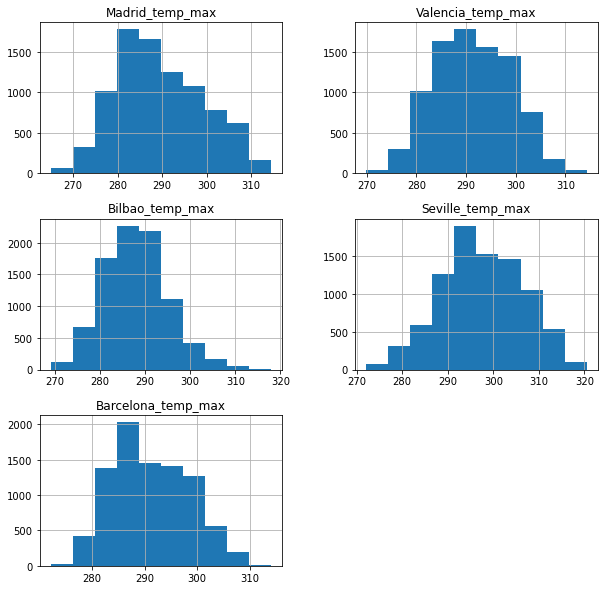

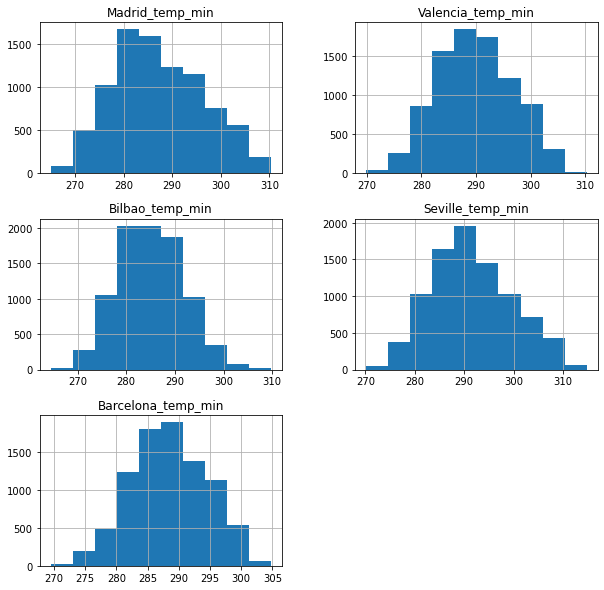

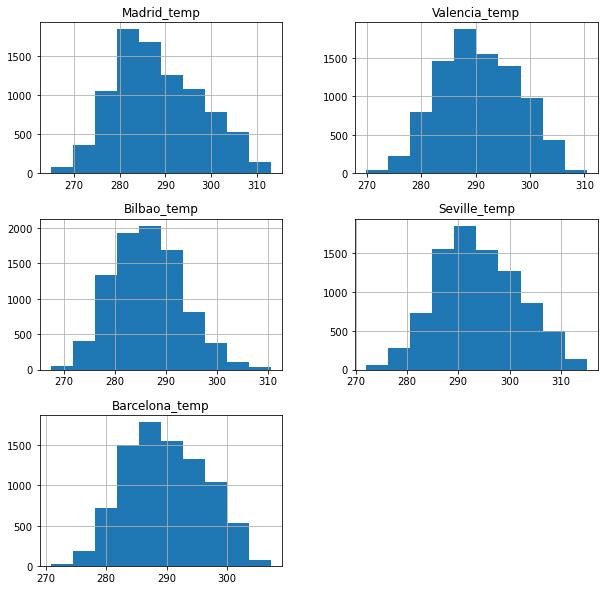

In [9]:
#histograms for Numerical data

#dependent variable
features_load_shortfall_3h = ['load_shortfall_3h']  # create a histogram for the y variable 
df[features_load_shortfall_3h].hist(figsize=(10,10), bins=10);

# wind speed
features_wind_speed = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_wind_speed'] # create a list of all numerical features(wind_speed)
df[features_wind_speed].hist(figsize=(10,10), bins=10);
    
                             
# wind degrees
features_wind_speed = ['Bilbao_wind_deg', 'Barcelona_wind_deg'] # create a list of all numerical features(wind_speed)
df[features_wind_speed].hist(figsize=(10,10), bins=10);                             
                      
                             
#rain_1hr
features_rain_1h = ['Madrid_rain_1h', 'Bilbao_rain_1h','Seville_rain_1h','Barcelona_rain_1h'] # create a list of all numerical features (rain_1h)
df[features_rain_1h].hist(figsize=(10,10), bins=10);   
                             
                          
#humidity
features_humidity = ['Madrid_humidity', 'Valencia_humidity', 'Seville_humidity'] # create a list of all numerical features (humidity)
df[features_humidity].hist(figsize=(10,10));
                                                         

#clouds
features_clouds_all = ['Madrid_clouds_all', 'Bilbao_clouds_all', 'Seville_clouds_all'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));
                             
                             
#pressure
features_clouds_all = ['Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure', 'Seville_pressure', 'Barcelona_pressure'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));                             
                           
#snow_3h
features_clouds_all = ['Valencia_snow_3h', 'Bilbao_snow_3h'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));

#rain_3h
features_clouds_all = ['Seville_rain_3h', 'Barcelona_rain_3h'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));
                             
                             
#weather_id
features_clouds_all = ['Madrid_weather_id', 'Bilbao_weather_id', 'Seville_weather_id', 'Barcelona_weather_id'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));                             
                           
#temp_max                             
features_temp_max = ['Madrid_temp_max', 'Valencia_temp_max', 'Bilbao_temp_max', 'Seville_temp_max', 'Barcelona_temp_max'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);

#temp_max                             
features_temp_max = ['Madrid_temp_min', 'Valencia_temp_min', 'Bilbao_temp_min', 'Seville_temp_min', 'Barcelona_temp_min'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);                          
                     
#temp                            
features_temp_max = ['Madrid_temp', 'Valencia_temp', 'Bilbao_temp', 'Seville_temp', 'Barcelona_temp'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);
                             

It is observed from the graphs above that the following variables have  0.0 values (skewed to the left)
- Barcelona_pressure
- Valencia_snow_3h
- Bilbao_snow_3h
- Seville_rain_3h

The following variables have alot of 0.0 value (skewed to the left)
- Seville_rain_1h','Barcelona_rain_1h
- Seville_rain_1h','Barcelona_rain_1h

<AxesSubplot:xlabel='Seville_pressure', ylabel='count'>

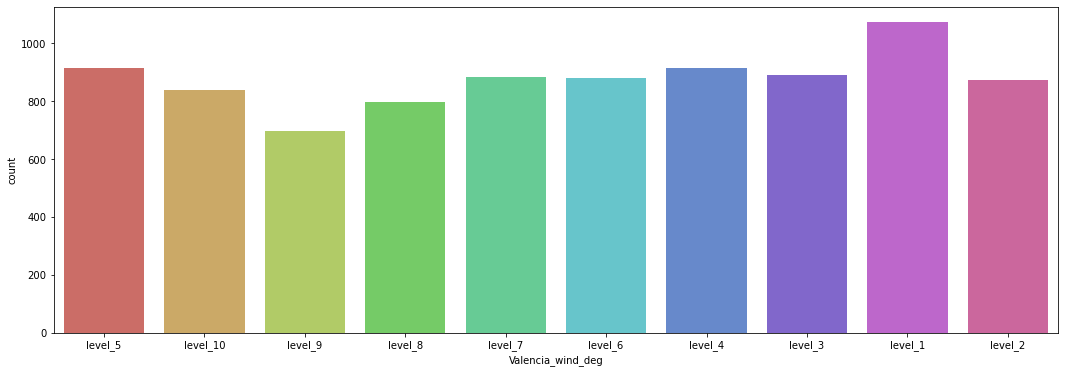

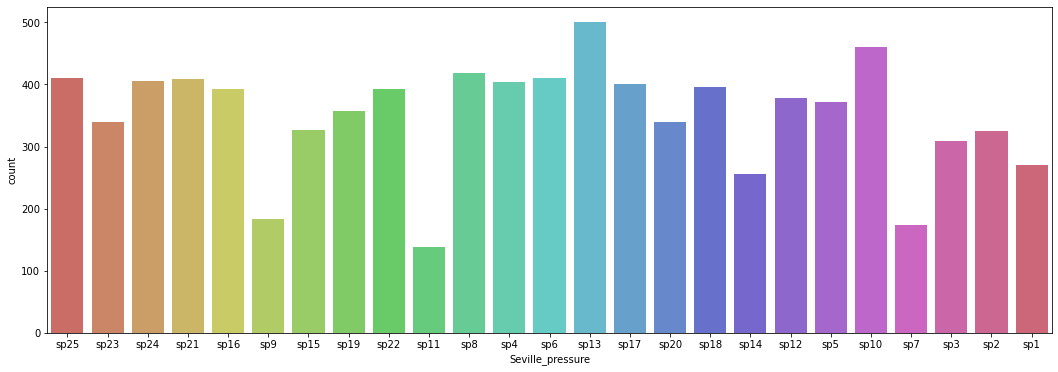

In [10]:
#categorical bar plots

#wind_deg
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Valencia_wind_deg', data = df, palette="hls")

#Seville_pressure
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Seville_pressure', data = df, palette="hls")

### 3.5 Outliers

Kurtosis can be used to detect outliers. The expected kurtosis value is between [3,-3]. If the number is greater than 3 it means there is a huge number of outliers.


In [11]:
#kurtosis
df.kurtosis()

C:\Users\lnzon\AppData\Local\Temp/ipykernel_16172/4194022645.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

From the ananlysis above it is observed that the following variables have a kurtosis value larger than 3.

- Bilbao_rain_1h            
- Valencia_wind_speed       
- Bilbao_wind_speed          
- Barcelona_rain_1h        
- Seville_rain_1h           
- Bilbao_snow_3h           
- Barcelona_pressure      
- Seville_rain_3h          
- Madrid_rain_1h            
- Barcelona_rain_3h        
- Valencia_snow_3h        
- Madrid_weather_id          
- Barcelona_weather_id       
- Seville_weather_id        
- Valencia_pressure          

*__Boxplots__*

Boxplots and scatter plots can be used to graphically illustrate if there are outliers in the data.If there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes.

The black dots in the graphs below represent the outliers for each of the variables.

<AxesSubplot:>

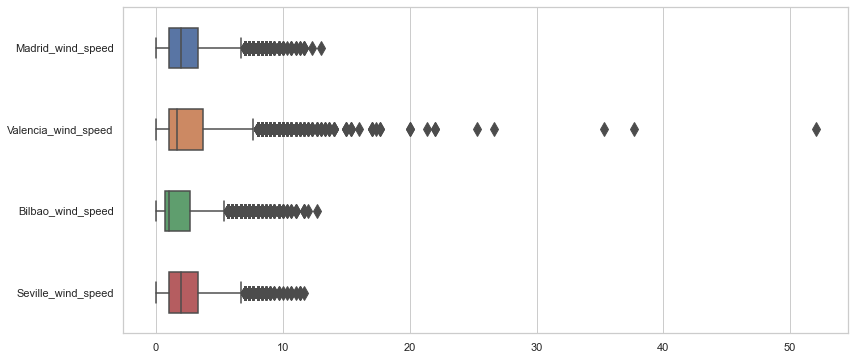

In [12]:
#wind speed
selected_columns = df[ [ 'Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_wind_speed' ] ]
df_wind_speed = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_wind_speed,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

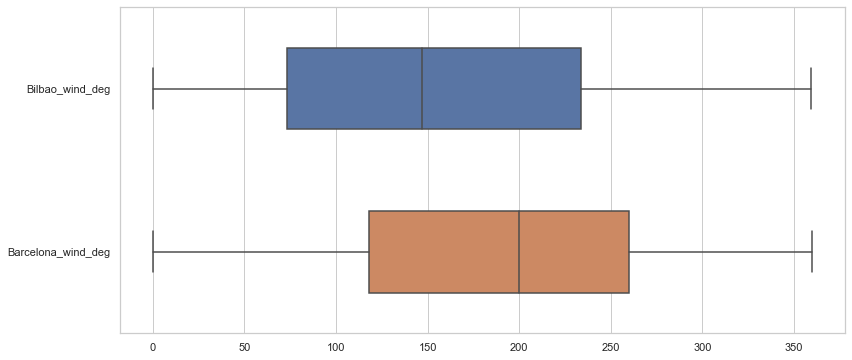

In [13]:
#wind speed
selected_columns = df[ [ 'Bilbao_wind_deg', 'Barcelona_wind_deg'] ]
df_wind_deg = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_wind_deg,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

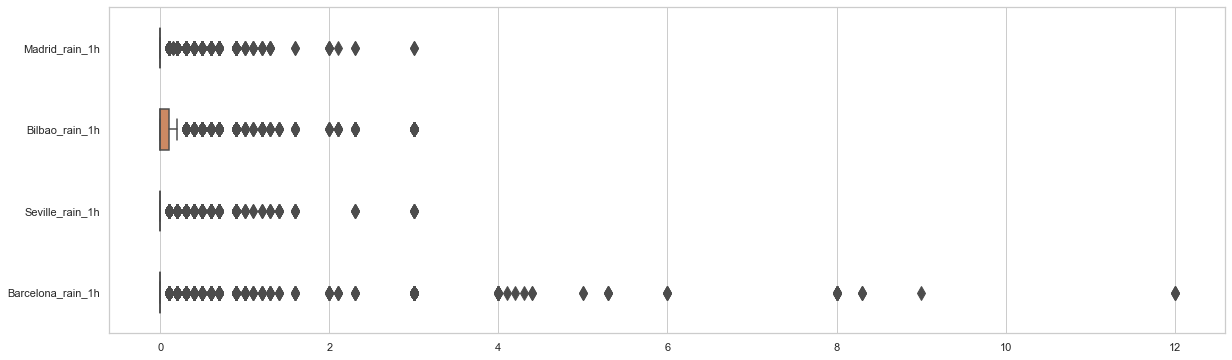

In [14]:
#rain_1h
selected_columns = df[ ['Madrid_rain_1h', 'Bilbao_rain_1h','Seville_rain_1h','Barcelona_rain_1h'] ]
df_rain_1h = selected_columns.copy() 



sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(20,6))
sns.boxplot(data=df_rain_1h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

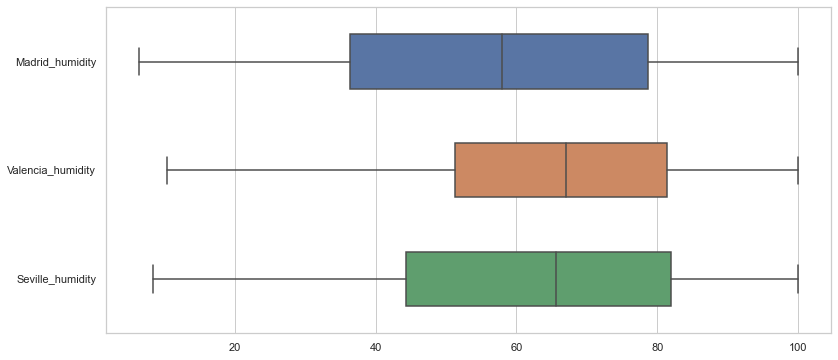

In [15]:
#humidity
selected_columns = df[ ['Madrid_humidity', 'Valencia_humidity', 'Seville_humidity'] ]
df_humidity = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_humidity,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

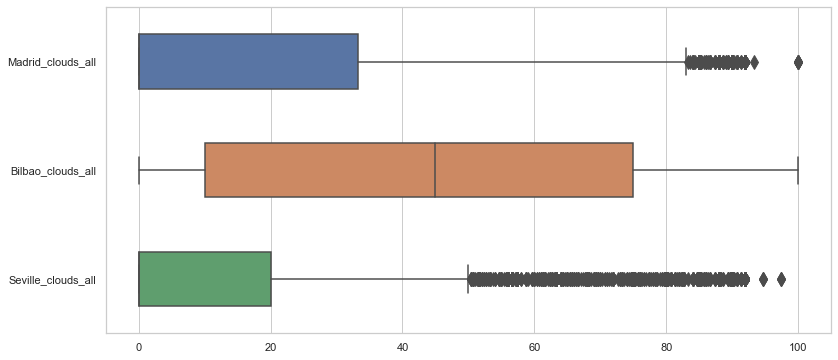

In [16]:
#clouds_all
selected_columns = df[ ['Madrid_clouds_all', 'Bilbao_clouds_all', 'Seville_clouds_all'] ]
df_clouds_all = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_clouds_all,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

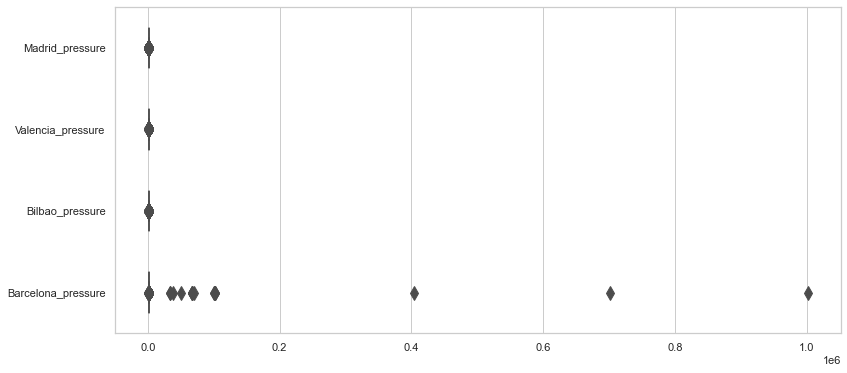

In [17]:
#pressure
selected_columns = df[ ['Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure', 'Seville_pressure', 'Barcelona_pressure'] ]
df_pressure = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_pressure,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

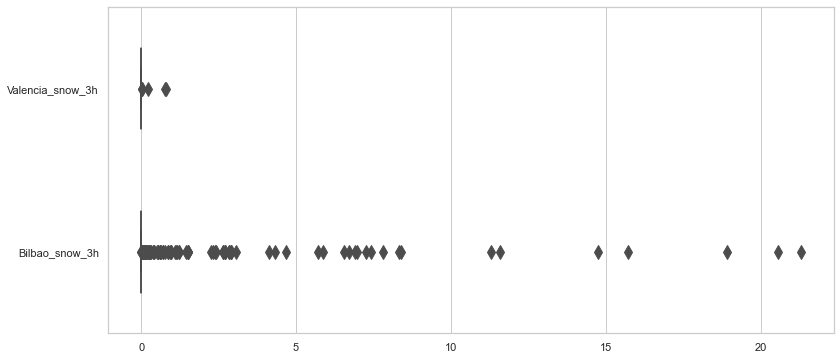

In [18]:
#snow_3h
selected_columns = df[ ['Valencia_snow_3h', 'Bilbao_snow_3h'] ]
df_snow_3h = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_snow_3h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

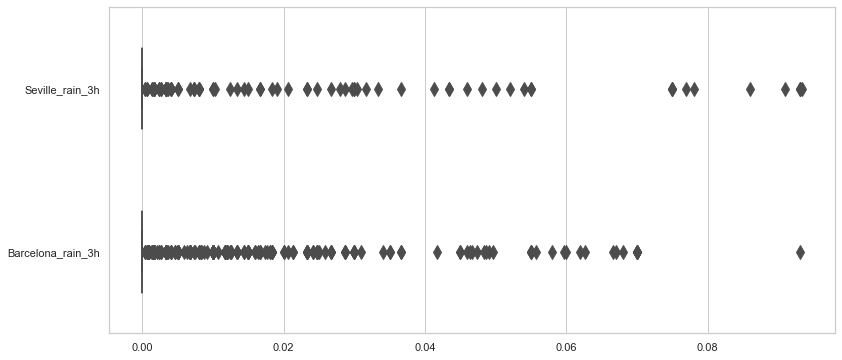

In [19]:
#rain_3h
selected_columns = df[ ['Seville_rain_3h', 'Barcelona_rain_3h' ]]
df_rain_3h = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_rain_3h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

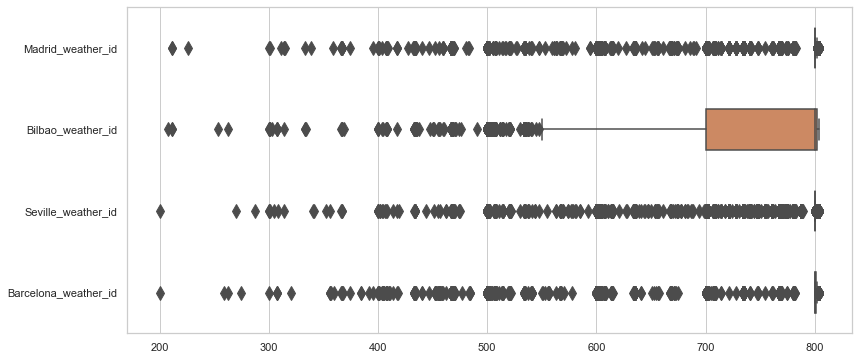

In [20]:
#weather_id
selected_columns = df[ ['Madrid_weather_id', 'Bilbao_weather_id', 'Seville_weather_id', 'Barcelona_weather_id' ]]
df_weather_id = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_weather_id,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

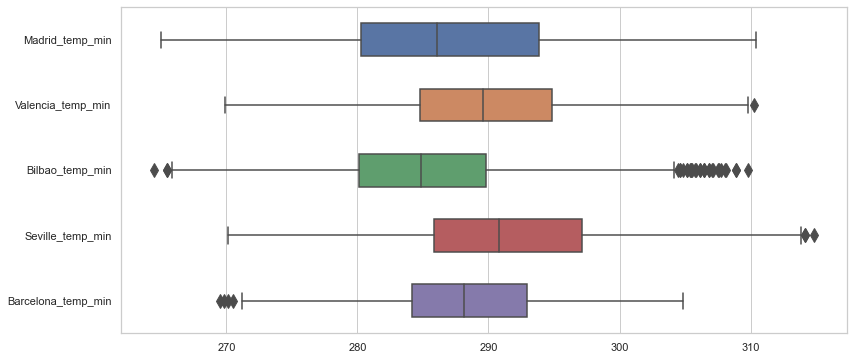

In [21]:
#temp_min
selected_columns = df[ ['Madrid_temp_min', 'Valencia_temp_min', 'Bilbao_temp_min', 'Seville_temp_min', 'Barcelona_temp_min']]
df_temp_min = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_temp_min,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

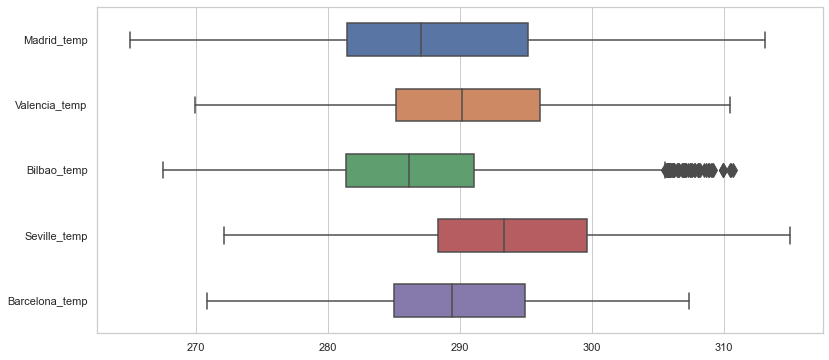

In [22]:
#temp
selected_columns = df[ ['Madrid_temp', 'Valencia_temp', 'Bilbao_temp', 'Seville_temp', 'Barcelona_temp']]
df_temp = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_temp,orient="h",width=0.5, fliersize=10)

The data set will be standardised in the data engineering section, while this will not eliminate outliers it will consider them in a more conservative manner.

### 3.6 Correlation and Multicollinearity

It is not expected for individual features to have a strong correlation with the response variable. This will show that the feature and the response variable have a relationship.

Below are plots of the relevant feature interactions

C:\Users\lnzon\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:xlabel='Barcelona_temp', ylabel='load_shortfall_3h'>

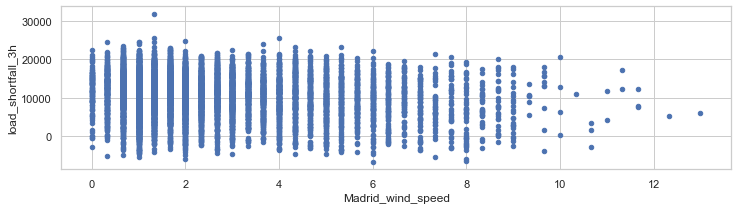

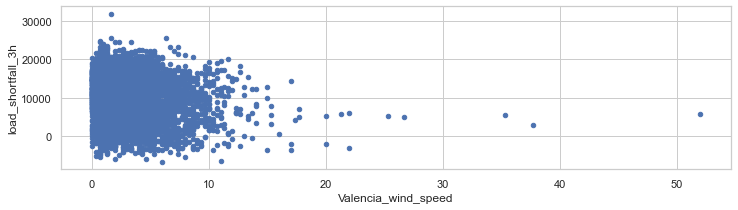

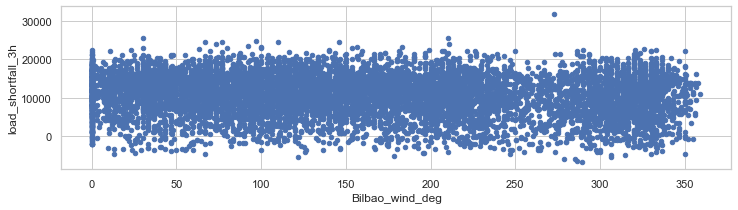

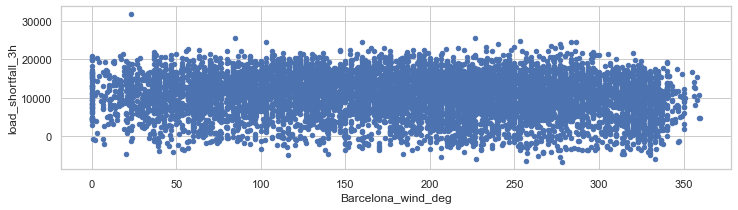

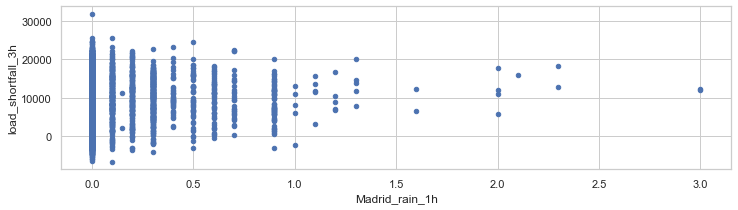

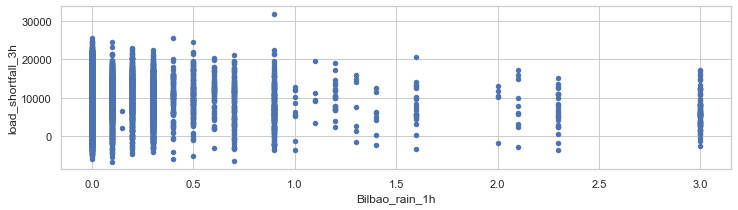

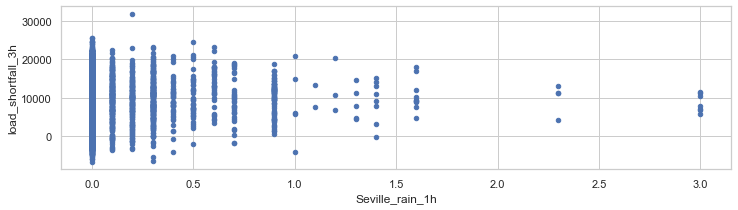

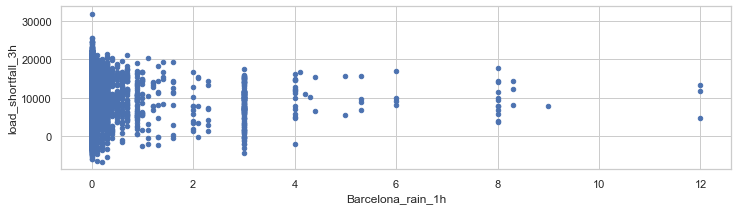

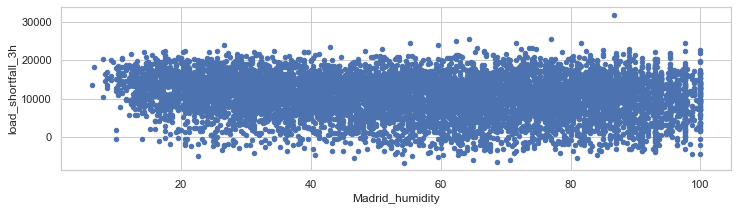

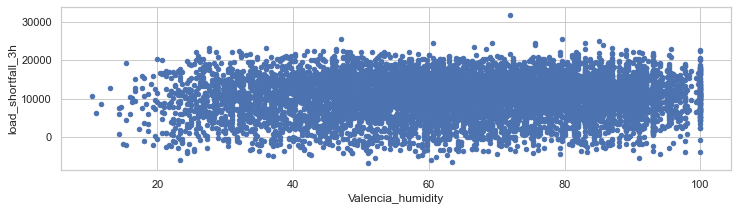

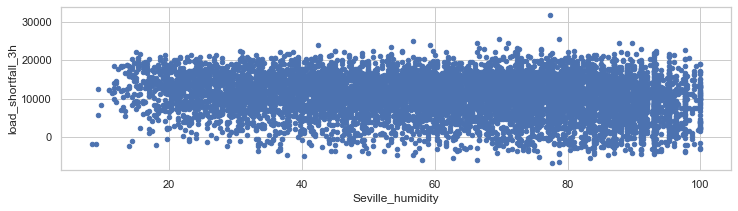

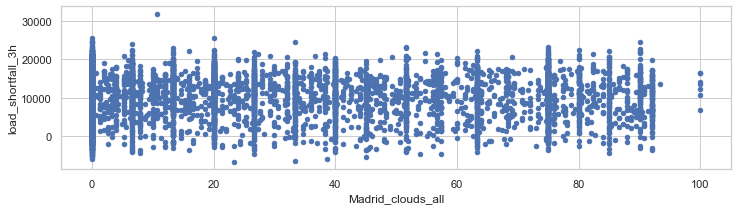

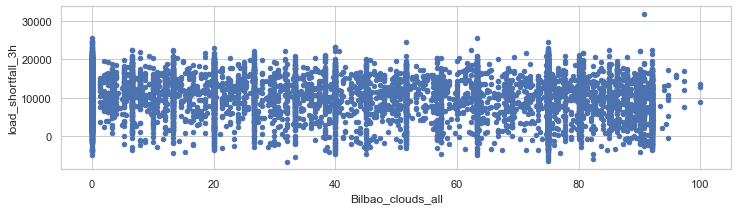

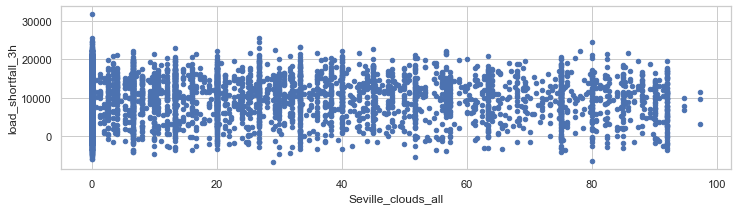

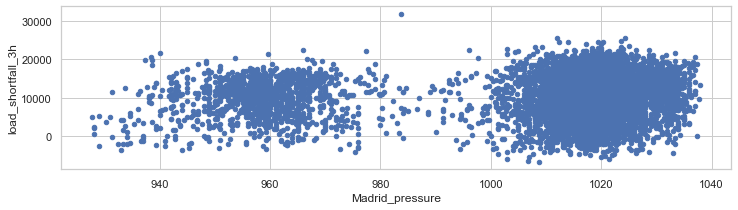

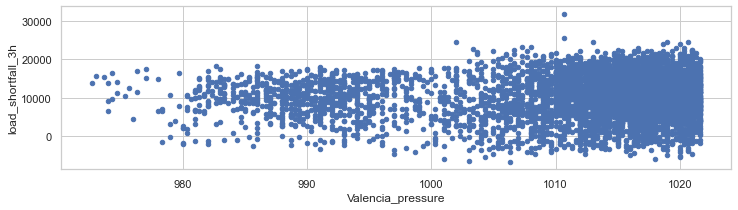

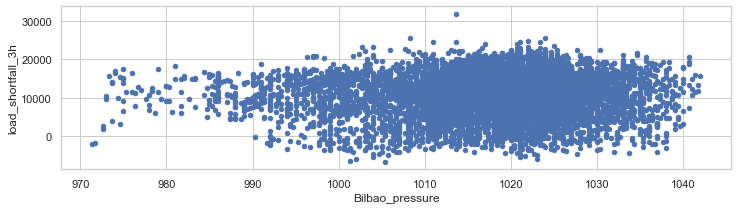

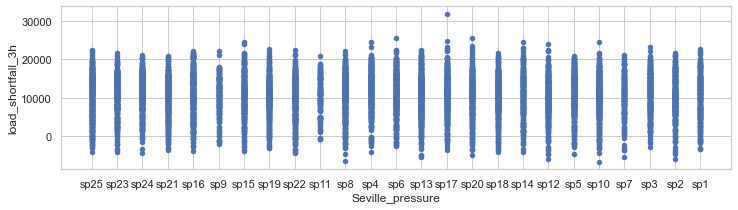

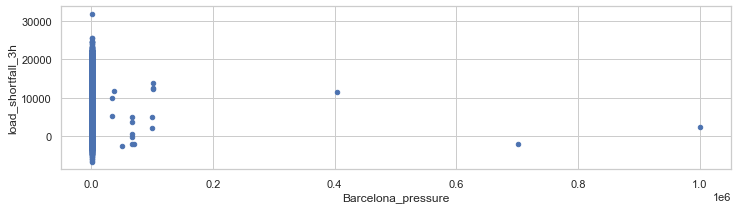

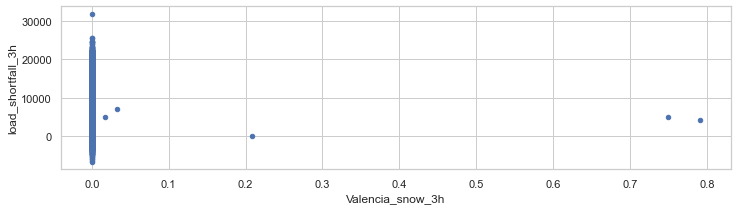

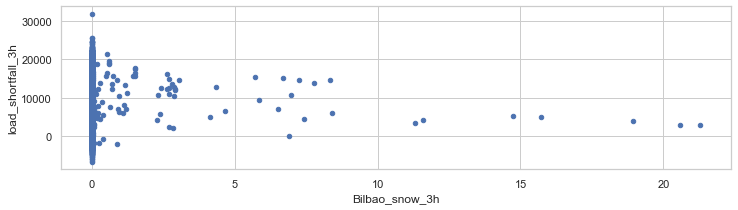

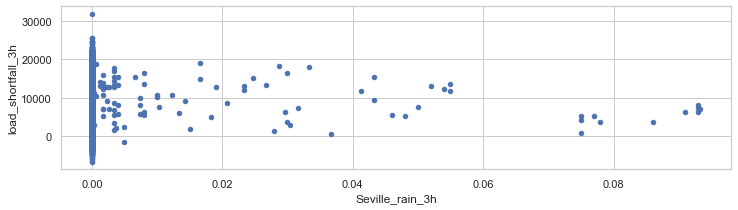

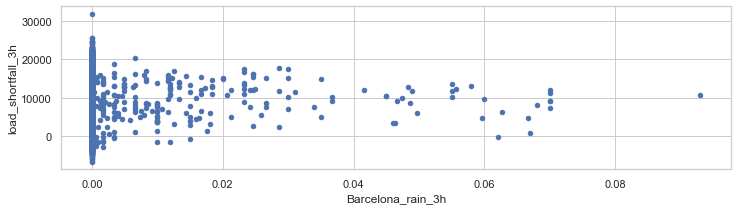

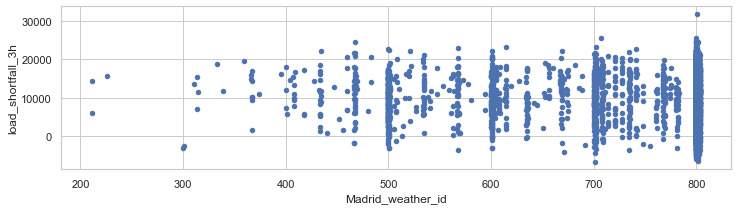

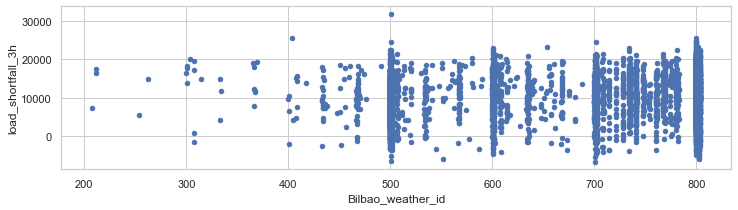

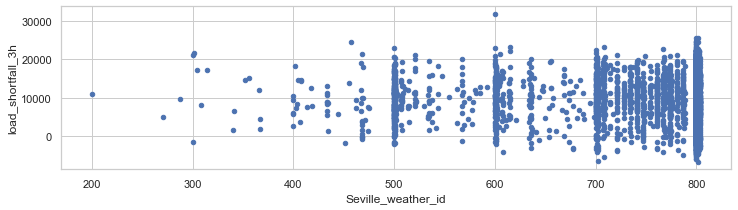

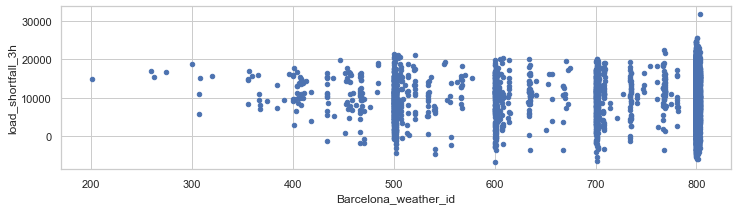

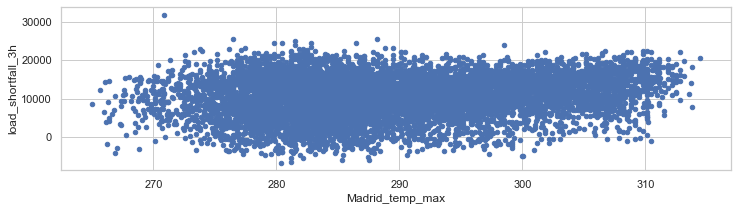

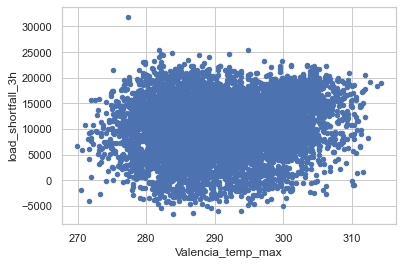

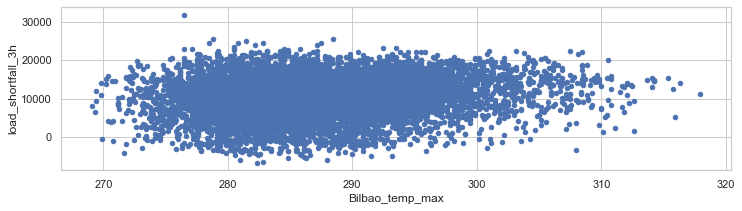

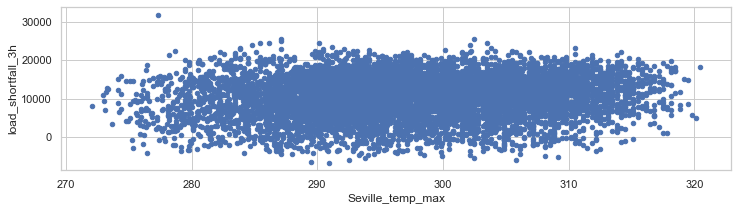

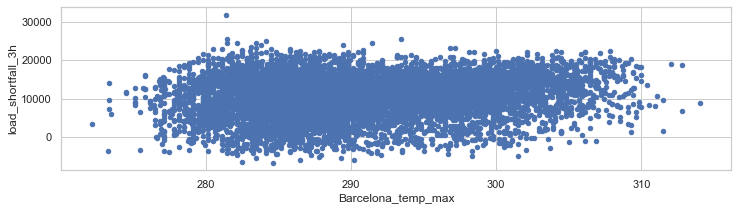

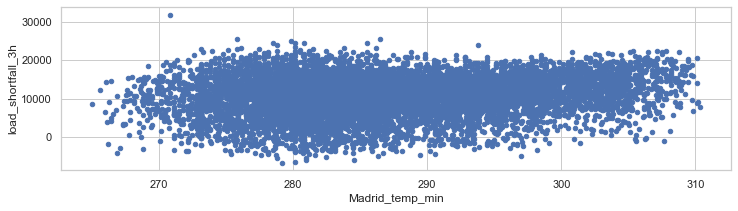

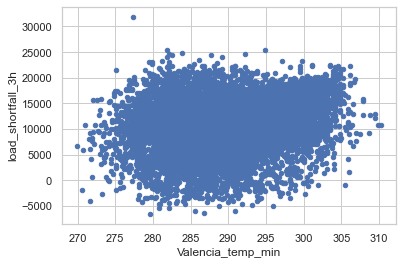

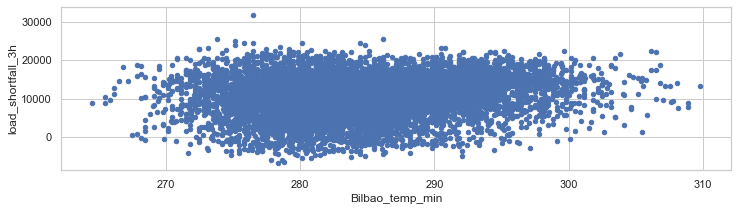

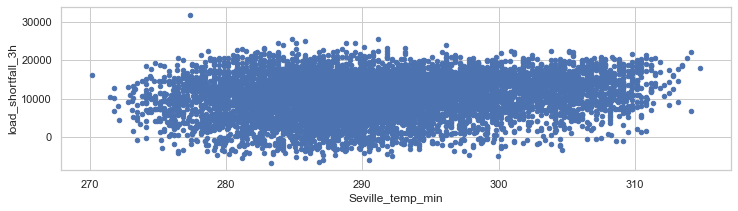

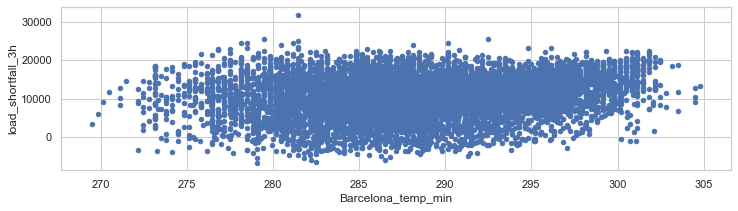

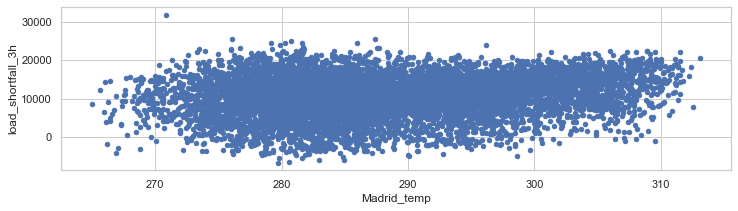

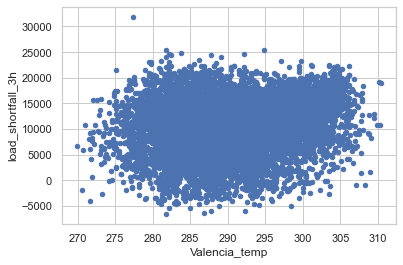

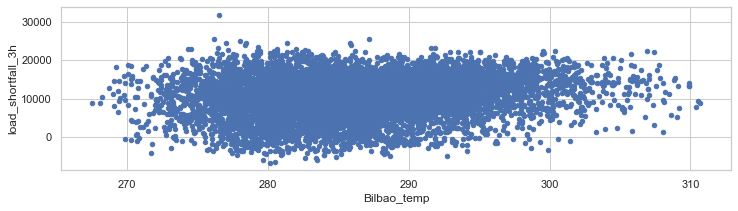

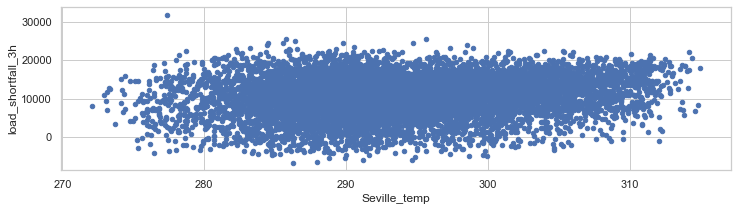

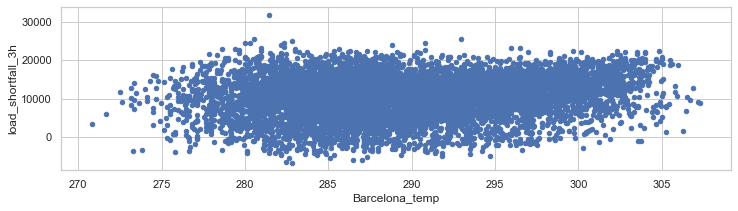

In [23]:

# wind speed
df.plot.scatter(x='Madrid_wind_speed',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_wind_speed',y='load_shortfall_3h', figsize=(12, 3))

# wind degrees
df.plot.scatter(x='Bilbao_wind_deg',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_wind_deg',y='load_shortfall_3h', figsize=(12, 3))

#rain
df.plot.scatter(x='Madrid_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_rain_1h',y='load_shortfall_3h', figsize=(12, 3))

#humidity

df.plot.scatter(x='Madrid_humidity',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_humidity',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_humidity',y='load_shortfall_3h', figsize=(12, 3))

#clouds
df.plot.scatter(x='Madrid_clouds_all',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_clouds_all',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_clouds_all',y='load_shortfall_3h', figsize=(12, 3))


#pressure
df.plot.scatter(x='Madrid_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_pressure',y='load_shortfall_3h', figsize=(12, 3))

#snow_3h
df.plot.scatter(x='Valencia_snow_3h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_snow_3h',y='load_shortfall_3h', figsize=(12, 3))

#rain_3h
df.plot.scatter(x='Seville_rain_3h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_rain_3h',y='load_shortfall_3h', figsize=(12, 3))

#weather_id
df.plot.scatter(x='Madrid_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_weather_id',y='load_shortfall_3h', figsize=(12, 3))

#temp_max
df.plot.scatter(x='Madrid_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp_max',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp_max',y='load_shortfall_3h', figsize=(12, 3))

#temp_min
df.plot.scatter(x='Madrid_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp_min',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp_min',y='load_shortfall_3h', figsize=(12, 3))

#temp
df.plot.scatter(x='Madrid_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp',y='load_shortfall_3h', figsize=(12, 3))

We observe no clear negative or positive correclation with regards to the features and load shortfall

In [24]:
# evaluate correlation
df.corr()


,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,-0.218781,-0.140449,-0.116928,-0.093926,-0.075692,-0.075340,-0.092377,-0.040157,-0.082525,-0.068980,-0.104326,-0.028130,0.047202,0.034761,-0.022475,0.072472,0.267772,0.039424,0.385578,0.087002,0.135294,0.192485,0.042897,0.023917,0.185468,0.047417,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.37785

The following features are positively correclated with load_shortfall_3h
 - Madrid_wind_speed
 - Bilbao_rain_1h
 - Valencia_wind_speed
 - Seville_humidity
 - Madrid_humidity
 - Madrid_humidity
 - Bilbao_clouds_all
 - Bilbao_wind_speed
 - Seville_clouds_all
 - Bilbao_wind_deg
 - Barcelona_wind_speed
 - Barcelona_wind_deg
 - Madrid_clouds_all
 - Seville_wind_speed
 - Barcelona_rain_1h
 - Bilbao_snow_3h
 - Barcelona_pressure
 - Seville_rain_3h
 - Madrid_rain_1h
 - Barcelona_rain_3h
 - Valencia_snow_3h


The following features are negatively correclated with load_shortfall_3h

 
- Madrid_weather_id
- Barcelona_weather_id
- Bilbao_pressure
- Seville_weather_id
- Valencia_pressure
- Seville_temp_max
- Madrid_pressure
- Valencia_temp_max
- Valencia_temp
- Bilbao_weather_id
- Seville_temp
- Valencia_humidity
- Barcelona_temp_max
- Madrid_temp_max
- Barcelona_temp
- Bilbao_temp_min
- Bilbao_temp
- Barcelona_temp_min
- Bilbao_temp_max
- Seville_temp_min
- Madrid_temp
- Madrid_temp_min

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section  the data set will cleaned and the features will be engineered, accordingly with issues identified the EDA phase. 

We will look at:

- Updating the categorical features (time,Valencia_wind_deg and Seville_pressure)
- Removing missing values
- Scaling and Standardisation
- Variable Selection using Mutual Information Feature Selectionn
- Preparing the test dataset

### 4.1 Updating the categorical features

*__Time__*

In [25]:
#changing the time column from 'object' dtype to 'date'

df['time'] = pd.to_datetime(df['time'])

df["time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8763 entries, 0 to 8762
Series name: time
Non-Null Count  Dtype         
--------------  -----         
8763 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.6 KB


In order to model time it needs to be converted to intergers.

In [26]:
# day
df['Day'] = df['time'].dt.day
# month
df['Month'] = df['time'].dt.month
# year
df['Year'] = df['time'].dt.year
# hour
df['Start_hour'] = df['time'].dt.hour
# minute
df['Start_minute'] = df['time'].dt.minute
# second
df['Start_second'] = df['time'].dt.second
# Monday is 0 and Sunday is 6
df['Start_weekday'] = df['time'].dt.weekday
# week of the year
df['Start_week_of_year'] = df['time'].dt.week
# duration
#df['Duration'] = dfer['End_date']-dfer['Start_date']

C:\Users\lnzon\AppData\Local\Temp/ipykernel_16172/2116675621.py:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Start_week_of_year'] = df['time'].dt.week


In [27]:
df.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,1,1,2015,3,0,0,3,1
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,1,1,2015,6,0,0,3,1


Categorical variables also need to be converted to numerical variables so that they can be modelled.


*__Valencia_wind_deg__*

In [28]:
df['Valencia_wind_deg']=df['Valencia_wind_deg'].str.extract('(\d+)')
df['Valencia_wind_deg'] = pd.to_numeric(df['Valencia_wind_deg'])
df['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: int64

*__Seville_pressure__*

In [29]:
df['Seville_pressure']=df['Seville_pressure'].str.extract('(\d+)')
df['Seville_pressure'] = pd.to_numeric(df['Seville_pressure'])
df['Seville_pressure'] 

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: int64

### 4.2 Missing Values


The missing values in __Valencia_pressure__  will be replaced with the mean.The columns, __Valencia_snow_3h__, __Bilbao_snow_3h__, __Seville_rain_3h__, and __Barcelona_rain_3h__  will be removed because because they have only zero values.

In [30]:
# remove missing values/ features

#Filling missing value with the mean
df_clean = df.fillna(value=df['Valencia_pressure'].mean())
#removing the unnamed column
df_clean.drop('Unnamed: 0', inplace =True, axis=1)

#dropping column that have only zero values
df_clean.drop(columns =['Valencia_snow_3h', 'Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_rain_3h'], inplace= True)

df_clean.head(2)


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,1036.333333,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,1,1,2015,3,0,0,3,1
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25,0.0,1037.333333,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,1,1,2015,6,0,0,3,1


There are now no variables with missing data

In [31]:
df_clean.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Barcelona_pressure      0
Madrid_rain_1h          0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_temp          0
Bilbao_temp_min         0
Bilbao_temp             0
Barcelona_te

### 4.3 Scaling and Standardisation

Z-score standardisation handles outliers gracefully. Z-score standardisation is implemented by applying the following operation to each of our values

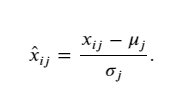

where μj represents the mean of variable xj and σj is the variable's standard deviation

Standardisation divides by a  distribution-aware measure, the standard deviation. While this doesn't completely remove the effects of outliers, it does consider them in a more conservative manner. 


In [32]:
# split predictors and response and time
X = df_clean.drop(['load_shortfall_3h','time'], axis=1)
y = df_clean['load_shortfall_3h']

X.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,1036.333333,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,1,1,2015,3,0,0,3,1
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25,0.0,1037.333333,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,1,1,2015,6,0,0,3,1


In [33]:
# Import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

In [34]:
# Create scaler object
scaler = StandardScaler()

In [35]:
# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

In [36]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)


X_standardise.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,-1.660205,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024277,-0.247776,0.342424,0.385993,1.718219,0.352274,-1.129531,-2.616796,-1.756232,-2.835227,-2.890888,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.42038,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,-1.675368,-1.602429,-1.226179,-1.090901,0.0,0.0,-0.00274,-1.709703
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,-0.578686,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024206,-0.247776,0.342424,0.385993,1.784583,0.352274,-0.928934,-2.539014,-1.696165,-2.591966,-2.633926,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.37437,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,-1.675368,-1.602429,-1.226179,-0.654451,0.0,0.0,-0.00274,-1.709703


In [37]:
#combine presictors and response variable into one data frame
df2 = pd.concat([X_standardise, y], axis = 1)
df2.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year,load_shortfall_3h
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,-1.660205,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024277,-0.247776,0.342424,0.385993,1.718219,0.352274,-1.129531,-2.616796,-1.756232,-2.835227,-2.890888,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.42038,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,-1.675368,-1.602429,-1.226179,-1.090901,0.0,0.0,-0.00274,-1.709703,6715.666667
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,-0.578686,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024206,-0.247776,0.342424,0.385993,1.784583,0.352274,-0.928934,-2.539014,-1.696165,-2.591966,-2.633926,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.37437,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,-1.675368,-1.602429,-1.226179,-0.654451,0.0,0.0,-0.00274,-1.709703,4171.666667


### 4.3 Variable Selection using Mutual Information Feature Selection


__Feature selection using mutual information statistics__

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.
We can perform feature selection using mutual information on the dataset and print and plot the scores.

In [38]:
#split x and y
X = df2.drop(['load_shortfall_3h'], axis=1)
y = df2['load_shortfall_3h']

In [39]:
#Import libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs



Feature 0: 0.017995
Feature 1: 0.023674
Feature 2: 0.019807
Feature 3: 0.019788
Feature 4: 0.025077
Feature 5: 0.025599
Feature 6: 0.022904
Feature 7: 0.018637
Feature 8: 0.006224
Feature 9: 0.018953
Feature 10: 0.003021
Feature 11: 0.011061
Feature 12: 0.008790
Feature 13: 0.004940
Feature 14: 0.007876
Feature 15: 0.009090
Feature 16: 0.000000
Feature 17: 0.008872
Feature 18: 0.000000
Feature 19: 0.008098
Feature 20: 0.018192
Feature 21: 0.016100
Feature 22: 0.014083
Feature 23: 0.012957
Feature 24: 0.022196
Feature 25: 0.020487
Feature 26: 0.035652
Feature 27: 0.024702
Feature 28: 0.026722
Feature 29: 0.050798
Feature 30: 0.015438
Feature 31: 0.031008
Feature 32: 0.033039
Feature 33: 0.037210
Feature 34: 0.043638
Feature 35: 0.024411
Feature 36: 0.047474
Feature 37: 0.047260
Feature 38: 0.037187
Feature 39: 0.035281
Feature 40: 0.046714
Feature 41: 0.049515
Feature 42: 0.111848
Feature 43: 0.067689
Feature 44: 0.031264
Feature 45: 0.076767
Feature 46: 0.000000
Feature 47: 0.000000
Fe

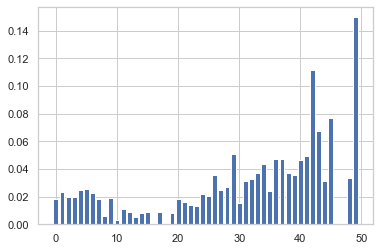

In [40]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

*__Use Random Forest Regressor to choose optimum features__*

In [41]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
feature = RFE(RandomForestRegressor(n_estimators = 100,random_state = 0,n_jobs = 1), n_features_to_select=30)

In [42]:
feature.fit(X_train,y_train)

RFE(estimator=RandomForestRegressor(n_jobs=1, random_state=0),
    n_features_to_select=30)

In [43]:
#True variables selected
#False varaibles not selected
feature.get_support()

array([ True,  True, False,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True, False,  True, False,  True,
       False, False, False,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True, False,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True, False, False,  True,  True])

In [44]:
#Optimal features
new_feature =X_train.columns[(feature.get_support())]
new_feature

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_wind_speed',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Seville_wind_speed', 'Seville_pressure', 'Barcelona_pressure',
       'Bilbao_pressure', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Bilbao_weather_id', 'Valencia_humidity',
       'Valencia_temp_min', 'Madrid_temp_max', 'Bilbao_temp_min',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Day',
       'Month', 'Year', 'Start_hour', 'Start_weekday', 'Start_week_of_year'],
      dtype='object')

In [45]:
df_optimal_feature=df2[new_feature]
df_optimal_feature.head()

,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,Seville_pressure,Barcelona_pressure,Bilbao_pressure,Valencia_pressure,Seville_temp_max,Madrid_pressure,Bilbao_weather_id,Valencia_humidity,Valencia_temp_min,Madrid_temp_max,Bilbao_temp_min,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Day,Month,Year,Start_hour,Start_weekday,Start_week_of_year
0,-0.950708,-0.096053,-0.796169,0.516117,0.270621,-0.501451,0.630823,1.932284,-1.660205,0.542975,1.588087,-0.024277,1.718219,-1.129531e+00,-2.616796,-1.756232,0.649842,0.540928,-2.892663,-2.420380,-2.338357,-1.218309,-2.621665,-2.125118,-1.675368,-1.602429,-1.226179,-1.090901,-0.00274,-1.709703
1,-1.130863,1.641580,-0.381412,0.692953,0.298017,-0.501451,0.607959,0.630270,-0.578686,0.542975,1.588087,-0.024206,1.784583,-9.289340e-01,-2.539014,-1.696165,0.649842,0.298645,-2.626219,-2.374370,-2.183645,-1.292271,-2.475661,-2.040702,-1.675368,-1.602429,-1.226179,-0.654451,-0.00274,-1.709703
2,-0.770554,1.294054,-0.657917,0.383491,0.284319,-0.501451,0.542632,-0.485743,1.520733,0.144442,1.588087,-0.024158,1.817765,-8.085757e-01,-2.105564,-1.636097,0.649842,0.021750,-1.716949,-1.726058,-1.489980,-1.124792,-1.821036,-1.570279,-1.675368,-1.602429,-1.226179,-0.218001,-0.00274,-1.709703
3,-0.770554,0.946527,-0.657917,0.118238,-0.044439,-0.501451,0.398912,-0.299741,0.925711,0.941509,1.588087,-0.024229,1.817765,-3.672620e-01,-1.361703,-0.705052,0.649842,-0.583957,-0.719283,-0.783992,-0.579082,-0.821553,-0.961406,-0.762967,-1.675368,-1.602429,-1.226179,0.218449,-0.00274,-1.709703
4,-0.770554,0.599000,-0.657917,-0.161751,-0.017043,-0.894581,0.255192,0.816272,0.779762,0.343708,1.588087,-0.024372,1.751401,2.736630e-13,-1.348214,1.127003,0.649842,-0.358980,-0.992113,-0.908771,-0.412497,-0.693885,-0.804197,-0.748327,-1.675368,-1.602429,-1.226179,0.654899,-0.00274,-1.709703


In [46]:
df_new_features = pd.concat([df_optimal_feature, y],axis = 1)
df_new_features.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,Seville_pressure,Barcelona_pressure,Bilbao_pressure,Valencia_pressure,Seville_temp_max,Madrid_pressure,Bilbao_weather_id,Valencia_humidity,Valencia_temp_min,Madrid_temp_max,Bilbao_temp_min,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Day,Month,Year,Start_hour,Start_weekday,Start_week_of_year,load_shortfall_3h
0,-0.950708,-0.096053,-0.796169,0.516117,0.270621,-0.501451,0.630823,1.932284,-1.660205,0.542975,1.588087,-0.024277,1.718219,-1.129531,-2.616796,-1.756232,0.649842,0.540928,-2.892663,-2.42038,-2.338357,-1.218309,-2.621665,-2.125118,-1.675368,-1.602429,-1.226179,-1.090901,-0.00274,-1.709703,6715.666667
1,-1.130863,1.641580,-0.381412,0.692953,0.298017,-0.501451,0.607959,0.630270,-0.578686,0.542975,1.588087,-0.024206,1.784583,-0.928934,-2.539014,-1.696165,0.649842,0.298645,-2.626219,-2.37437,-2.183645,-1.292271,-2.475661,-2.040702,-1.675368,-1.602429,-1.226179,-0.654451,-0.00274,-1.709703,4171.666667


### 4.4 Preparing the test dataset

In [47]:
df_test= pd.read_csv("df_test.csv")
df_test.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.0,NaN,284.483333,1030.000000,287.483333,287.483333,801.0,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.0,NaN,282.483333,1030.333333,284.150000,284.150000,721.0,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


In [48]:
#Will be used to extract time later on
df_test1= df_test.copy(deep=True)
df_test1.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.0,NaN,284.483333,1030.000000,287.483333,287.483333,801.0,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.0,NaN,282.483333,1030.333333,284.150000,284.150000,721.0,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


In [49]:
df_test['time'] = pd.to_datetime(df_test['time'])

In [50]:
#convert time data
# day
df_test['Day'] = df_test['time'].dt.day
# month
df_test['Month'] = df_test['time'].dt.month
# year
df_test['Year'] = df_test['time'].dt.year
# hour
df_test['Start_hour'] = df_test['time'].dt.hour
# minute
df_test['Start_minute'] = df_test['time'].dt.minute
# second
df_test['Start_second'] = df_test['time'].dt.second
# Monday is 0 and Sunday is 6
df_test['Start_weekday'] = df_test['time'].dt.weekday
# week of the year
df_test['Start_week_of_year'] = df_test['time'].dt.week


C:\Users\lnzon\AppData\Local\Temp/ipykernel_16172/1790339839.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_test['Start_week_of_year'] = df_test['time'].dt.week


In [51]:
#convert categorical data
df_test['Valencia_wind_deg']=df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])

df_test['Seville_pressure']=df_test['Seville_pressure'].str.extract('(\d+)')
df_test['Seville_pressure'] = pd.to_numeric(df_test['Seville_pressure'])

In [52]:
# remove missing values/ features

#Filling missing value with the mean
df_clean_test = df_test.fillna(value=df['Valencia_pressure'].mean())
#removing the unnamed column
df_clean_test.drop('Unnamed: 0', inplace =True, axis=1)

#dropping column that have only zero values
df_clean_test.drop(columns =['Valencia_snow_3h', 'Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_rain_3h'], inplace= True)


Scaling Test Data frame

In [53]:
# split predictors and response
X1_test= df_clean_test.drop(['time'], axis=1)

In [54]:
# Import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

# Create scaled version of the predictors (there is no need to scale the response)
X_scaled_test = scaler.fit_transform(X1_test)

# Convert the scaled predictor values into a dataframe
X_standardise_test = pd.DataFrame(X_scaled_test,columns=X1_test.columns)

In [55]:
#Optimal features
new_feature_optimal=['Madrid_wind_speed', 'Valencia_wind_deg', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_wind_speed',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Seville_wind_speed', 'Seville_pressure', 'Barcelona_pressure',
       'Bilbao_pressure', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Bilbao_weather_id', 'Valencia_humidity',
       'Valencia_temp_min', 'Madrid_temp_max', 'Bilbao_temp_min',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Day',
       'Month', 'Year', 'Start_hour', 'Start_weekday', 'Start_week_of_year']

In [56]:
#Optimal features
df_new_features_test=X_standardise_test[new_feature_optimal]
df_new_features_test.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,Seville_pressure,Barcelona_pressure,Bilbao_pressure,Valencia_pressure,Seville_temp_max,Madrid_pressure,Bilbao_weather_id,Valencia_humidity,Valencia_temp_min,Madrid_temp_max,Bilbao_temp_min,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Day,Month,Year,Start_hour,Start_weekday,Start_week_of_year
0,1.432590,0.703345,0.9956,0.964514,0.360022,0.433023,0.314013,0.911814,-0.026595,-0.926549,2.079927,0.287199,1.021118,-0.154092,-0.944893,1.429950,0.602769,-0.99662,-0.534281,-0.888160,-1.289378,-0.322082,-0.535933,-0.885760,-1.673503,-1.602745,0.0,-1.527525,-1.493348,-1.690057
1,1.244747,0.703345,1.1626,1.061565,0.636255,0.835964,-0.197584,1.322013,1.008344,-1.112918,2.079927,0.714535,1.135113,-0.154092,-1.210834,1.464591,-0.151153,-0.59704,-0.998810,-0.924838,-1.044362,-0.787188,-0.696698,-1.138747,-1.673503,-1.602745,0.0,-1.091089,-1.493348,-1.690057


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, multiple regression models are fitted to the data. These model will be able to accurately predict the thee hour load shortfall. 

These are the models that will created:

- Fitting linear regression model using Sklearn.
- Fitting linear regression model on dataset that has optimal features using OLS
- Fitting a regularized linear regression model

### 5.1 Fitting   linear regression models using Sklearn and OLS

First a linear regression model is fitted to the cleaned data using Sklearn


In [57]:
# split predictors and response
X = df2.drop(['load_shortfall_3h'], axis=1)
y = df2['load_shortfall_3h']

In [58]:
# create model object
lm = LinearRegression()

In [59]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [60]:
# train model
lm.fit(X_train, y_train)

LinearRegression()

In [61]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [160]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [161]:
print("Intercept:", beta_0)



Intercept: 10682.485763096991


In [162]:
beta_js

,Coefficient
Madrid_wind_speed,-4.390633e+02
Valencia_wind_deg,-2.515612e+02
Bilbao_rain_1h,-1.753803e+02
Valencia_wind_speed,-1.666538e+02
Seville_humidity,-6.285080e+02
Madrid_humidity,-2.033924e+02
Bilbao_clouds_all,-1.382716e+02
Bilbao_wind_speed,-1.536614e+02
Seville_clouds_all,4.510265e+01
Bilbao_wind_deg,-2.149757e+02


__*Predictive accuracy*__

In [163]:
# Import metrics module
from sklearn import metrics

In [164]:
train_pred = lm.predict(X_train)

test_pred = lm.predict(X_test)

In [165]:
print('Train MSE:', round(metrics.mean_squared_error(y_train, train_pred)))

Train MSE: 21833994


In [166]:
print('Test MSE:', round(metrics.mean_squared_error(y_test, test_pred)))

Test MSE: 21759313


In [167]:
print("RMSE: ",round( np.sqrt(metrics.mean_squared_error(y_test,test_pred))))

RMSE:  4665


*__Predictions on test set__*

In [168]:
preds=lm.predict(X_standardise_test)

In [169]:
daf=pd.DataFrame(preds,columns=['load_shortfall_3h'])
daf.head()

,load_shortfall_3h
0,8168.949145
1,7748.171052
2,9219.636835
3,9182.640339
4,8573.685734


In [170]:
output=pd.DataFrame({'time':df_test1['time']})
submission=output.join(daf)
#submission.to_csv('submission.csv',index=False)

submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8168.949145
1,2018-01-01 03:00:00,7748.171052
2,2018-01-01 06:00:00,9219.636835
3,2018-01-01 09:00:00,9182.640339
4,2018-01-01 12:00:00,8573.685734
...,...,...
2915,2018-12-31 09:00:00,10216.415245
2916,2018-12-31 12:00:00,11904.868470
2917,2018-12-31 15:00:00,13518.121920
2918,2018-12-31 18:00:00,13567.475604


### 5.2 Fitting a model on the dataset with optimal features

A linear regression model is fitted on the  dataset where the optimal variables have been selected, using a statsmodels OLS function.

__(i). using ols__

In [171]:
import statsmodels.formula.api as sm

In [172]:
df4 =df_new_features.copy(deep=True)

In [173]:
formula_str = df4.columns[-1] +' ~ '+'+'.join(df4.drop(['load_shortfall_3h'], axis=1).columns[:-1]);formula_str

'load_shortfall_3h ~ Madrid_wind_speed+Valencia_wind_deg+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_wind_speed+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Seville_wind_speed+Seville_pressure+Barcelona_pressure+Bilbao_pressure+Valencia_pressure+Seville_temp_max+Madrid_pressure+Bilbao_weather_id+Valencia_humidity+Valencia_temp_min+Madrid_temp_max+Bilbao_temp_min+Barcelona_temp_min+Bilbao_temp_max+Seville_temp_min+Day+Month+Year+Start_hour+Start_weekday'

In [174]:
model=sm.ols(formula=formula_str, data=df4)

In [175]:
fitted = model.fit()

In [176]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     66.34
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:23:36   Log-Likelihood:                -86572.
No. Observations:                8763   AIC:                         1.732e+05
Df Residuals:                    8733   BIC:                         1.734e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.067e+04 

In [177]:
#mse of residuals
fitted.mse_resid

22386968.160629593

In [178]:
#rmse of residuals
round(np.sqrt(fitted.mse_resid))

4731

In [179]:
#total mse
fitted.mse_total

27228008.274591047

*__Checking for independence__*

Sklearn is limited in terms of metrics and tools available to evaluate the appropriateness of the regression models that are fitted. The statsmodels library  has a more broad set of statistical tools to  which enable a more expansive analysis.

<AxesSubplot:xlabel='Seville_temp_max', ylabel='residuals'>

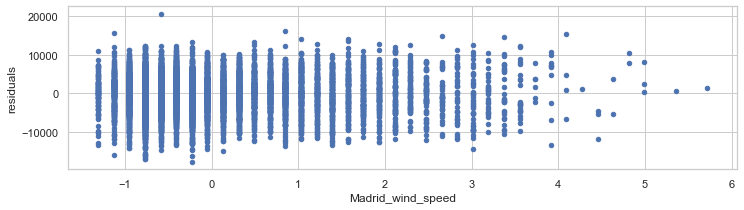

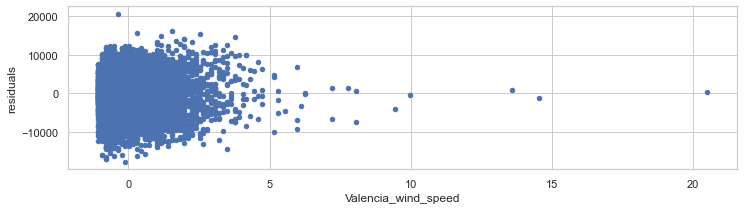

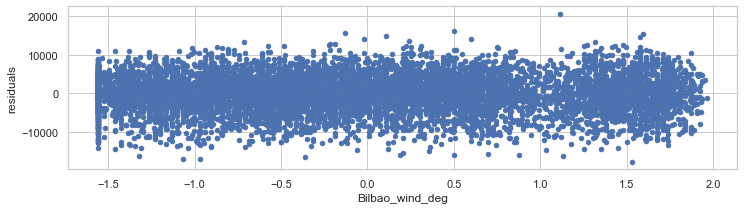

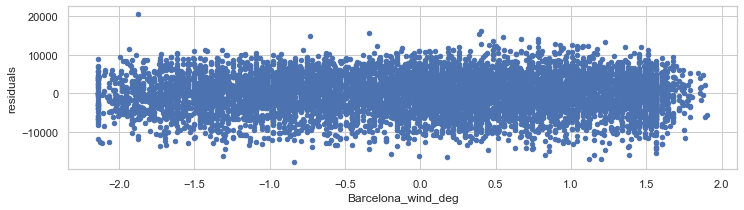

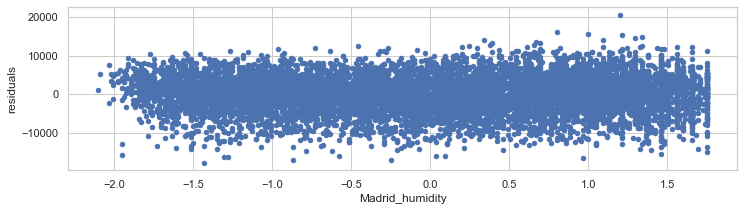

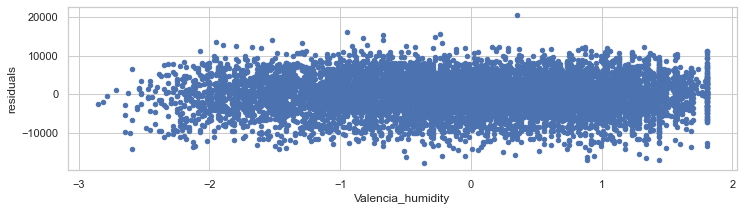

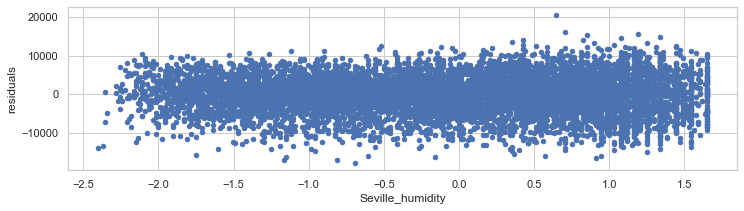

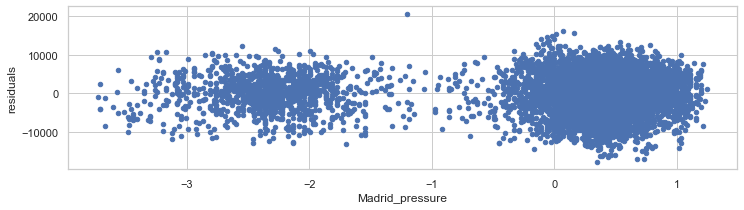

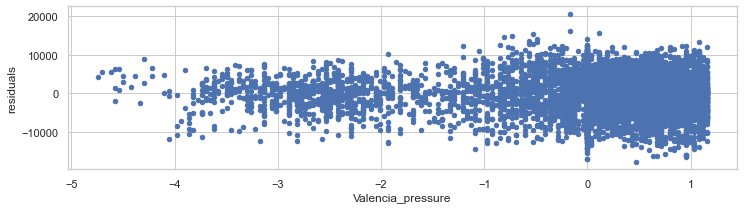

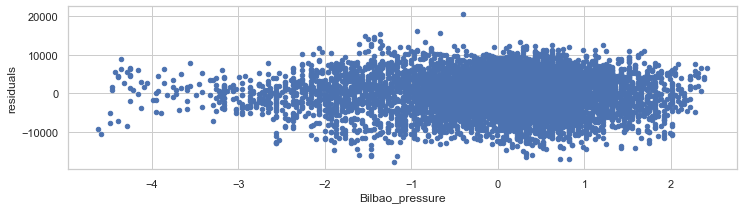

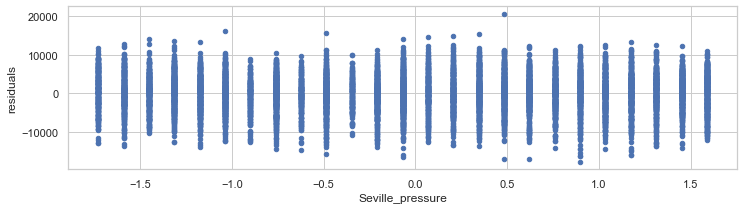

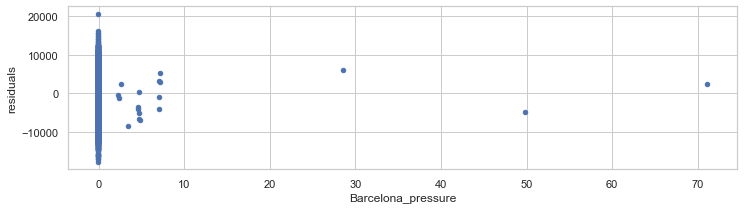

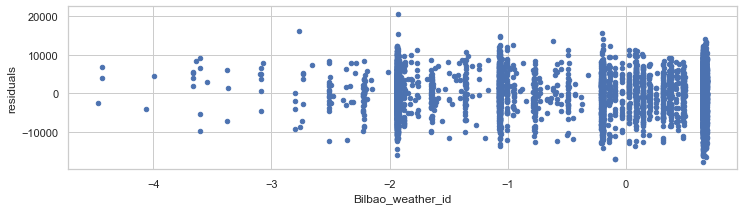

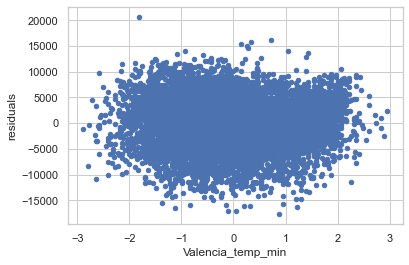

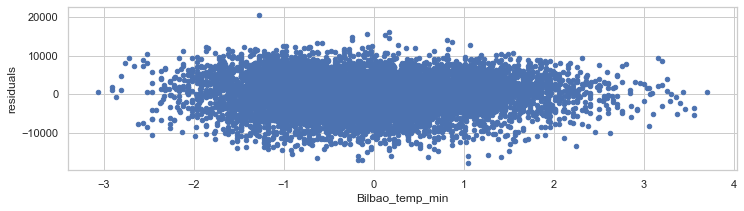

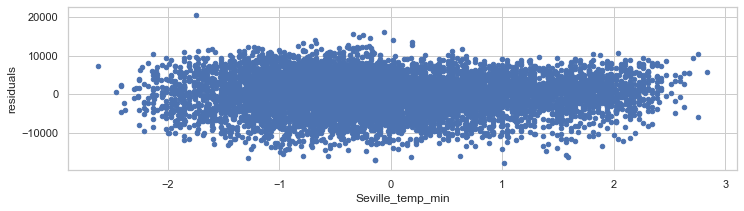

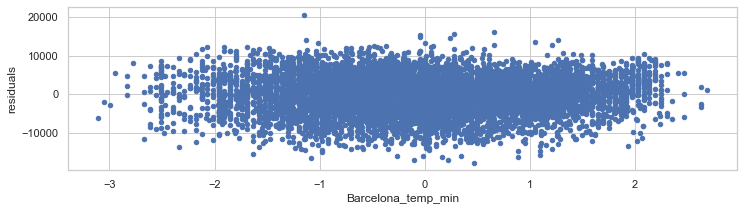

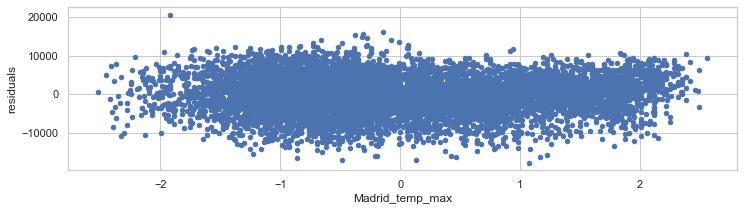

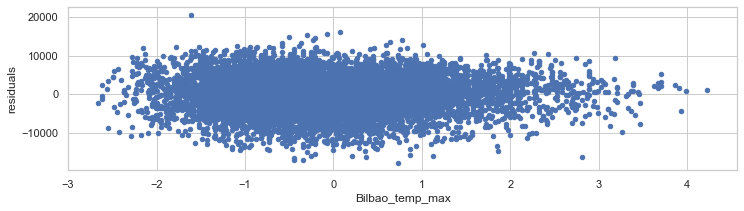

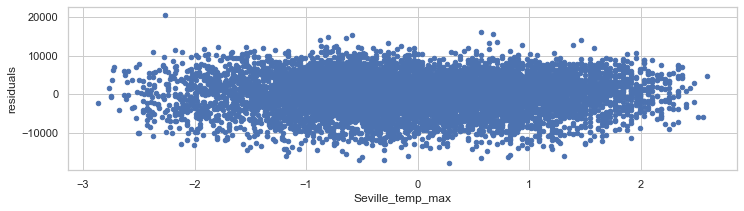

In [218]:
dfres=pd.DataFrame(fitted.resid, columns=['residuals'])

df4res = pd.concat([df4, dfres], axis = 1)

#wind speed
df4res.plot.scatter(x='Madrid_wind_speed',y='residuals', figsize=(12, 3))
df4res.plot.scatter(x='Valencia_wind_speed',y='residuals', figsize=(12, 3))
# wind degrees
df4res.plot.scatter(x='Bilbao_wind_deg',y='residuals', figsize=(12, 3))
df4res.plot.scatter(x='Barcelona_wind_deg',y='residuals', figsize=(12, 3))
#humidity
df4res.plot.scatter(x='Madrid_humidity',y='residuals', figsize=(12, 3))
df4res.plot.scatter(x='Valencia_humidity',y='residuals', figsize=(12, 3))
df4res.plot.scatter(x='Seville_humidity',y='residuals', figsize=(12, 3))
#pressure
df4res.plot.scatter(x='Madrid_pressure',y='residuals', figsize=(12, 3))
df4res.plot.scatter(x='Valencia_pressure',y='residuals', figsize=(12, 3))
df4res.plot.scatter(x='Bilbao_pressure',y='residuals', figsize=(12, 3))
df4res.plot.scatter(x='Seville_pressure',y='residuals', figsize=(12, 3))
df4res.plot.scatter(x='Barcelona_pressure',y='residuals', figsize=(12, 3))

#weather_id
df4res.plot.scatter(x='Bilbao_weather_id',y='residuals', figsize=(12, 3))

#temp_min
df4res.plot.scatter(x='Valencia_temp_min',y='residuals')
df4res.plot.scatter(x='Bilbao_temp_min',y='residuals', figsize=(12, 3))
df4res.plot.scatter(x='Seville_temp_min',y='residuals', figsize=(12, 3))
df4res.plot.scatter(x='Barcelona_temp_min',y='residuals', figsize=(12, 3))

#temp_max
df4res.plot.scatter(x='Madrid_temp_max',y='residuals', figsize=(12, 3))
df4res.plot.scatter(x='Bilbao_temp_max',y='residuals', figsize=(12, 3))
df4res.plot.scatter(x='Seville_temp_max',y='residuals', figsize=(12, 3))

There is obvious clustering in most of the predictor variables which i a clear indication of high dependency

__Checking for normality__

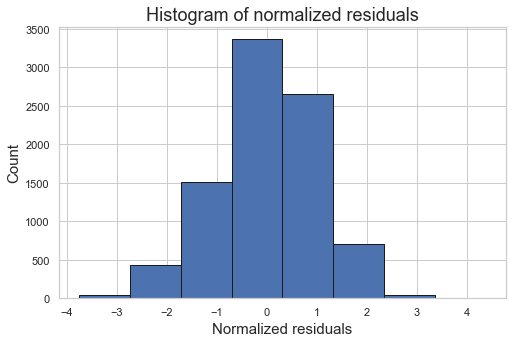

In [92]:
#histogram of normalized residuals
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

The normalized residuals are approximately normal

*__QQ plots of the residuals__*

In [93]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

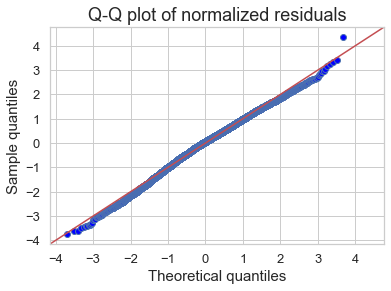

In [94]:
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

Judging only from the two checks above, the residuals do appear to be normally distributed.

| Model | RSME |
|:--- |:--- |
 |1. Linear Least Squares Regression | 4665|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4715|
 
 
 From the table above we can see that the linear regression with all the features has better predictive accuracy
 

### 5.3 Fitting a  regularized linear regression model

Regularisation offers an alternative method to the variable selection selection performed above. With regularisation the intention to scale each feature by how much it affects the response variable. There is a penality on those individual coefficients that get too large (those that contribute the most to reducing the fit).


An alternative model is now offered, where there is no descrete variable selection as in the above model. This will be achieved through ridge regression

#### Ridge Regression

In [100]:
df_ridge=df2.copy(deep=True)

In [101]:
df_ridge.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year,load_shortfall_3h
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,-1.660205,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024277,-0.247776,0.342424,0.385993,1.718219,0.352274,-1.129531e+00,-2.616796,-1.756232,-2.835227,-2.890888,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.420380,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,-1.675368,-1.602429,-1.226179,-1.090901,0.0,0.0,-0.00274,-1.709703,6715.666667
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,-0.578686,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024206,-0.247776,0.342424,0.385993,1.784583,0.352274,-9.289340e-01,-2.539014,-1.696165,-2.591966,-2.633926,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.374370,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,-1.675368,-1.602429,-1.226179,-0.654451,0.0,0.0,-0.00274,-1.709703,4171.666667
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,1.520733,-0.694188,0.144442,-0.203099,1.588087,-0.224278,-0.024158,-0.247776,0.342424,0.385993,1.817765,0.352274,-8.085757e-01,-2.105564,-1.636097,-1.761812,-1.757012,0.649842,-1.917409,0.021750,-1.716949,-1.316350,-1.726058,-1.267176,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407,-1.675368,-1.602429,-1.226179,-0.218001,0.0,0.0,-0.00274,-1.709703,4274.666667
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,0.925711,-0.694188,0.941509,-0.203099,1.588087,-0.224278,-0.024229,-0.247776,0.342424,0.385993,1.817765,0.352274,-3.672620e-01,-1.361703,-0.705052,-0.850953,-0.794849,0.649842,-1.083879,-0.583957,-0.719283,-1.061929,-0.783992,-0.983703,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488,-1.675368,-1.602429,-1.226179,0.218449,0.0,0.0,-0.00274,-1.709703,5075.666667
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,0.779762,-0.694188,0.343708,-0.203099,1.588087,-0.224278,-0.024372,-0.247776,0.342424,0.385993,1.751401,0.352274,2.736630e-13,-1.348214,1.127003,-1.100044,-1.057970,0.649842,-1.068764,-0.358980,-0.992113,-0.954814,-0.908771,-0.864356,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665,-1.675368,-1.602429,-1.226179,0.654899,0.0,0.0,-0.00274,-1.709703,6620.666667


In [102]:
X = df_ridge.drop(['load_shortfall_3h'], axis=1)
y = df_ridge['load_shortfall_3h']

In [103]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

In [104]:
# Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardise, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False)

In [105]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [106]:
# Create ridge model
ridge = Ridge(alpha=10)

In [107]:
# Train the model
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [108]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [109]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [110]:
print("Intercept:", float(b0))

Intercept: 10415.978633421639


In [111]:
# Check out the coefficients
coeff

,Coefficient
Madrid_wind_speed,-406.780597
Valencia_wind_deg,-167.512563
Bilbao_rain_1h,-201.815851
Valencia_wind_speed,-87.802070
Seville_humidity,-743.838500
Madrid_humidity,-260.798572
Bilbao_clouds_all,-115.849994
Bilbao_wind_speed,-59.469793
Seville_clouds_all,112.317674
Bilbao_wind_deg,-363.175644


__*Predictive accuracy of the  model*__ 

In [112]:
# Import metrics module
from sklearn import metrics

In [113]:
train_ridge = ridge.predict(X_train)

In [144]:
print('Ridge Train MSE:', round(metrics.mean_squared_error(y_train, train_ridge)))

Ridge Train MSE: 31832922


In [115]:
test_ridge = ridge.predict(X_test)

In [116]:
print('Ridge train MS :', round(metrics.mean_squared_error(y_test, test_ridge)))

Ridge train MS : 22441881


In [117]:
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test,test_ridge))))

RMSE:  4737


| Model | RSME |
|:--- |:--- |
 |1. Linear Least Squares Regression | 4665|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4715|
 |3. Ridge regression | 4737|
 
 The model with the best prdictive accuracy is still the linear regression with all the features.
 

### 5.4. Building a Random Forest Regression Model

In [118]:
df6 =df2.copy(deep=True)

In [119]:
X = df6.drop(['load_shortfall_3h'], axis=1)
y = df6['load_shortfall_3h']
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Train test split
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [120]:
#fitting decision tree
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=10)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=10)

In [121]:
#testing
from sklearn.metrics import mean_squared_error
# Get predictions
y_pred = RF.predict(x_test)

# Compute RMSE
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE: 3019.1753739984615


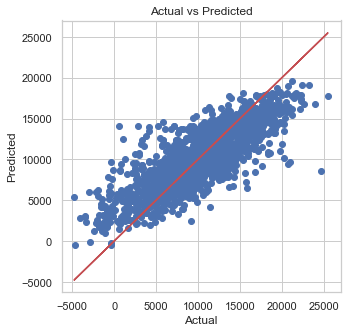

In [122]:
#fit actual vs expected
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()


__Tuning model hyperparameters__

In [123]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=10, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=23)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=23)

In [124]:
forest_1.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=2, random_state=23)

In [125]:
forest_2.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=20, random_state=23)

In [126]:
forest_3.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=23)

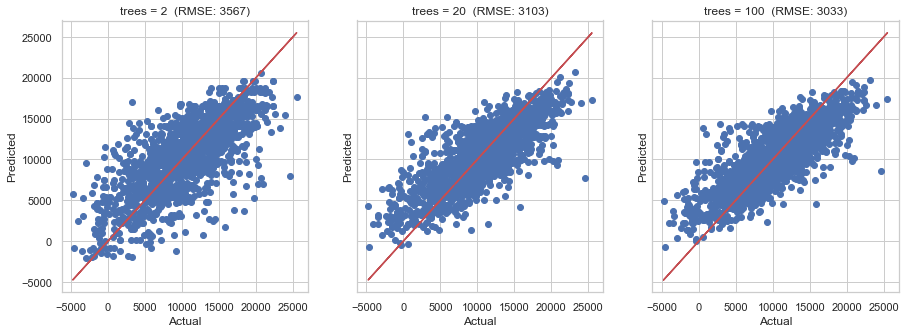

In [127]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [forest_1.predict(x_test), forest_2.predict(x_test), forest_3.predict(x_test)]
title = ['trees = 2', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

Looking at the RMSEs, the forest with 100 trees performed the best. This is our best performing model thus far.

| Model | RSME |
|:--- |:--- |
 |1. Linear Least Squares Regression | 4665|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4715|
 |3. Ridge regression | 4737|
 |4. Random Forest | 3033|
 
 The random forest model is has the best predictive accuracy.

In [128]:
#Predict on test dataframe
y_pred_test_RF = RF.predict(X_standardise_test)

In [129]:
daf2=pd.DataFrame(y_pred_test_RF,columns=['load_shortfall_3h'])
daf2

,load_shortfall_3h
0,8262.546714
1,2621.488565
2,2444.705992
3,4304.478856
4,5757.985477
...,...
2915,14211.783533
2916,15022.100840
2917,14592.548422
2918,15201.485560


In [130]:
output2=pd.DataFrame({'time':df_test1['time']})
submission_RF=output2.join(daf2)
#submission_RF.to_csv('submission_RF.csv',index=False)

submission_RF

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8262.546714
1,2018-01-01 03:00:00,2621.488565
2,2018-01-01 06:00:00,2444.705992
3,2018-01-01 09:00:00,4304.478856
4,2018-01-01 12:00:00,5757.985477
...,...,...
2915,2018-12-31 09:00:00,14211.783533
2916,2018-12-31 12:00:00,15022.100840
2917,2018-12-31 15:00:00,14592.548422
2918,2018-12-31 18:00:00,15201.485560


### 5.5. Fit a decision tree model

In [131]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=10)
DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [132]:
# Get predictions
y_pred = DT.predict(x_test)
# Compute RMSE
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE: 3650


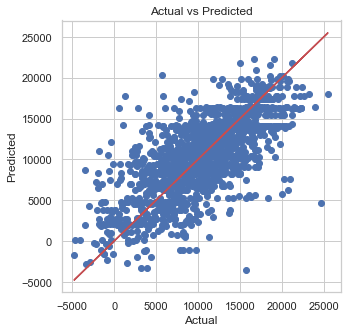

In [133]:
# Gfit actual vs expected
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()


| Model | RSME |
|:--- |:--- |
|1. Linear Least Squares Regression | 4665|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4715|
 |3. Ridge regression | 4737|
 |4. Random Forest | 3033|
 |5. Decision tree | 3650|
 
 The random forest model is has the best predictive accuracy.

In [134]:
#Predict test responde variable
y_pred3 = DT.predict(X_standardise_test)

daf3=pd.DataFrame(y_pred3,columns=['load_shortfall_3h'])


output3=pd.DataFrame({'time':df_test1['time']})
submission_DT=output3.join(daf3)
#submission_DT.to_csv('submission_DT.csv',index=False)

submission_DT

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9262.000000
1,2018-01-01 03:00:00,-441.833333
2,2018-01-01 06:00:00,-441.833333
3,2018-01-01 09:00:00,-1208.208333
4,2018-01-01 12:00:00,-1208.208333
...,...,...
2915,2018-12-31 09:00:00,13775.373333
2916,2018-12-31 12:00:00,16398.232456
2917,2018-12-31 15:00:00,16398.232456
2918,2018-12-31 18:00:00,16398.232456


### 5.6. Support Vector Regressor

In [135]:
from sklearn.svm import SVR

In [136]:
# Instantiate support vector regression model
sv_reg = SVR(kernel='rbf', gamma=0.1, C=0.001)

In [137]:
sv_reg.fit(x_train,y_train)

SVR(C=0.001, gamma=0.1)

In [138]:
y_pred = sv_reg.predict(x_test)
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE:  5128


| Model | RSME |
|:--- |:--- |
|1. Linear Least Squares Regression | 4665|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4715|
 |3. Ridge regression | 4737|
 |4. Random Forest | 3033|
 |5. Decision tree | 3650|
 |6. Support Vector Regressor | 5128|
 
 The random forest model has the best predictive accuracy.

### 5.7.  Heterogeneous Ensembles  

In [139]:
# Instantiate a voting ensemble usinG sklearn's VotingRegressor class
from sklearn.ensemble import VotingRegressor

In [140]:
# Define the models which we'll include in our ensemble. 
# We pass a list of tuples, which each have a string identifier for the
# model (arbitrary choice), along the actual instantiated sklearn model.  
models = [("rf",forest_3),("DT",DT),("lin modole",lm)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.5,0.4,0.1])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

At this point, a voting-based ensemble that combines 50% of Random Forest output, 40% of Decision Tree output and
10% of linear regression output has been built.


In [141]:
#making the final prediction
v_reg.fit(x_train,y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=10,
                                                   random_state=23)),
                            ('DT', DecisionTreeRegressor(max_depth=10)),
                            ('lin modole', LinearRegression())],
                weights=array([0.5, 0.4, 0.1]))

In [142]:
#Let's check the performance of the voting ensemble.
y_pred = v_reg.predict(x_test)
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test,y_pred))))


RMSE:  3141


| Model | RSME |
|:--- |:--- |
|1. Linear Least Squares Regression | 4665|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4715|
 |3. Ridge regression | 4737|
 |4. Random Forest | 3033|
 |5. Decision tree | 3650|
 |6. Support Vector Regressor | 5128|
 |7. Heterogeneous Ensembles | 3141|
 
 The random forest model has the best predictive accuracy.

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


We were able to fit 7 different models to our data. Each models peformance is evaluated using the Root Mean Square Error (RMSE). This is a measure of how the avarage error for each model. Below is a table that summarizes each model.



| Model | RSME |
|:--- |:--- |
|1. Linear Least Squares Regression | 4665|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4715|
 |3. Ridge regression | 4737|
 |4. Random Forest | 3033|
 |5. Decision tree | 3650|
 |6. Support Vector Regressor | 5128|
 |7. Heterogeneous Ensembles | 3401|


The model that had the best performance accuracy was the Random Forest model. On average the error for predicting the correct three hourly shortfalls is 3033.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



In this section, we will discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings.



To understand random forests, a  person must understand decisions trees.




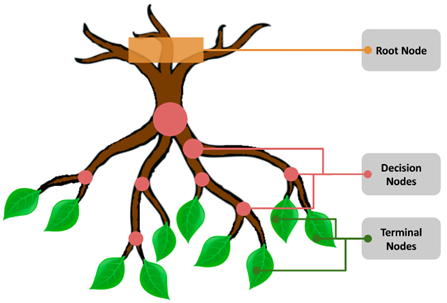





- Decision trees are constructed using two kinds of elements: nodes and branches as can be seen in the image. 
- At each node data is partitioned  into two different sections based on questions asked of one input variable (independent variable) in the data.
- This is done in order to make a prediction or to further ask questions about that input variable

For example:

- Is the minimum temperature in Barcelona greater than or equal to 25 if yes than 3 hour load shortfall is 3000.
- If it is not, another question will be asked like, is it greater than 30 if yes than 3 hour load shortfall is 2000.
- This is done until we reach a terminal node.


- A random forest combines many decision trees into a single model. 
- The problem with decision trees is that this model learns the data too closely and as a result, the model is useful in reference only to its initial data set and not to any other data sets.
- The predictions made by decision trees may not be accurate but combined together, the predictions will be closer to the mark on average.


In our random forest model we used 100 trees with 10 nodes. On average we were the actual prediction by 3033.

API

In [64]:
#import pickle

#model_save_path = "assets/trained-models/lm_model.pkl"
#with open(model_save_path,'wb') as file:
    #pickle.dump(lm,file)